In [2]:
import pandas as pd
import sys
from pathlib import Path
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sys.path.append(str(Path.cwd().parent.parent / "src")) # Necessário contar quantos niveis subir nas pastas, incluir 1 .parent para cada nivel.

# My custom functions and classes
from utils.paths import resolve_env_path, PROJECT_ROOT
from classes.time_series_dataset import TimeSeriesDataset
from classes.plotter import Plotter
from utils.calculations import plot_stl_decomposition
from utils.calculations import process_df

In [3]:
# ETS TRAIN (fitted)
train_df = pd.read_csv(PROJECT_ROOT / "notebooks" / "modeling" / "ets_forecast_TRAIN.csv")
train_df['date'] = pd.to_datetime(train_df['date'])
train_df = train_df[['date', 'continent', 'actual']].copy()

# ETS TEST (forecast)
test_df = pd.read_csv(PROJECT_ROOT / "notebooks" / "modeling" / "ets_forecasts_TEST.csv")
test_df['date'] = pd.to_datetime(test_df['date'])
test_df = test_df[['date', 'continent', 'actual']].copy()

In [7]:
test_df

date         continent    actual
0  2024-01-01  America_Do_Norte   17392.0
1  2024-02-01  America_Do_Norte   23972.0
2  2024-03-01  America_Do_Norte   24138.0
3  2024-04-01  America_Do_Norte   13860.0
4  2024-05-01  America_Do_Norte   13905.0
..        ...               ...       ...
91 2024-08-01             TOTAL   91504.0
92 2024-09-01             TOTAL  116003.0
93 2024-10-01             TOTAL  130985.0
94 2024-11-01             TOTAL  145148.0
95 2024-12-01             TOTAL  176121.0

[96 rows x 3 columns]

=== Auto ARIMA (SARIMA) - No Exogenous Variables ===
Train period: 2000-01-01 00:00:00 to 2023-12-01 00:00:00
Test period: 2024-01-01 00:00:00 to 2024-12-01 00:00:00



TARGET: AFRICA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1460.01

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4195.14
  Tested 40/144 models... Best AICc: 4195.00
  Tested 60/144 models... Best AICc: 4194.67
  Tested 80/144 models... Best AICc: 4194.67
  Tested 100/144 models... Best AICc: 4194.67
  Tested 120/144 models... Best AICc: 4194.67
  Tested 140/144 models... Best AICc: 4194.67

✓ Best Model Found: SARIMA(1, 1, 1) x (2, 1, 1, 12)
✓ AICc: 4194.67

--- Test Set Predictions ---
MAE: 177.97
RMSE: 207.88
MAPE: 53.26%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -20.9463
Residual Std: 481.06

T-Test for Zero M

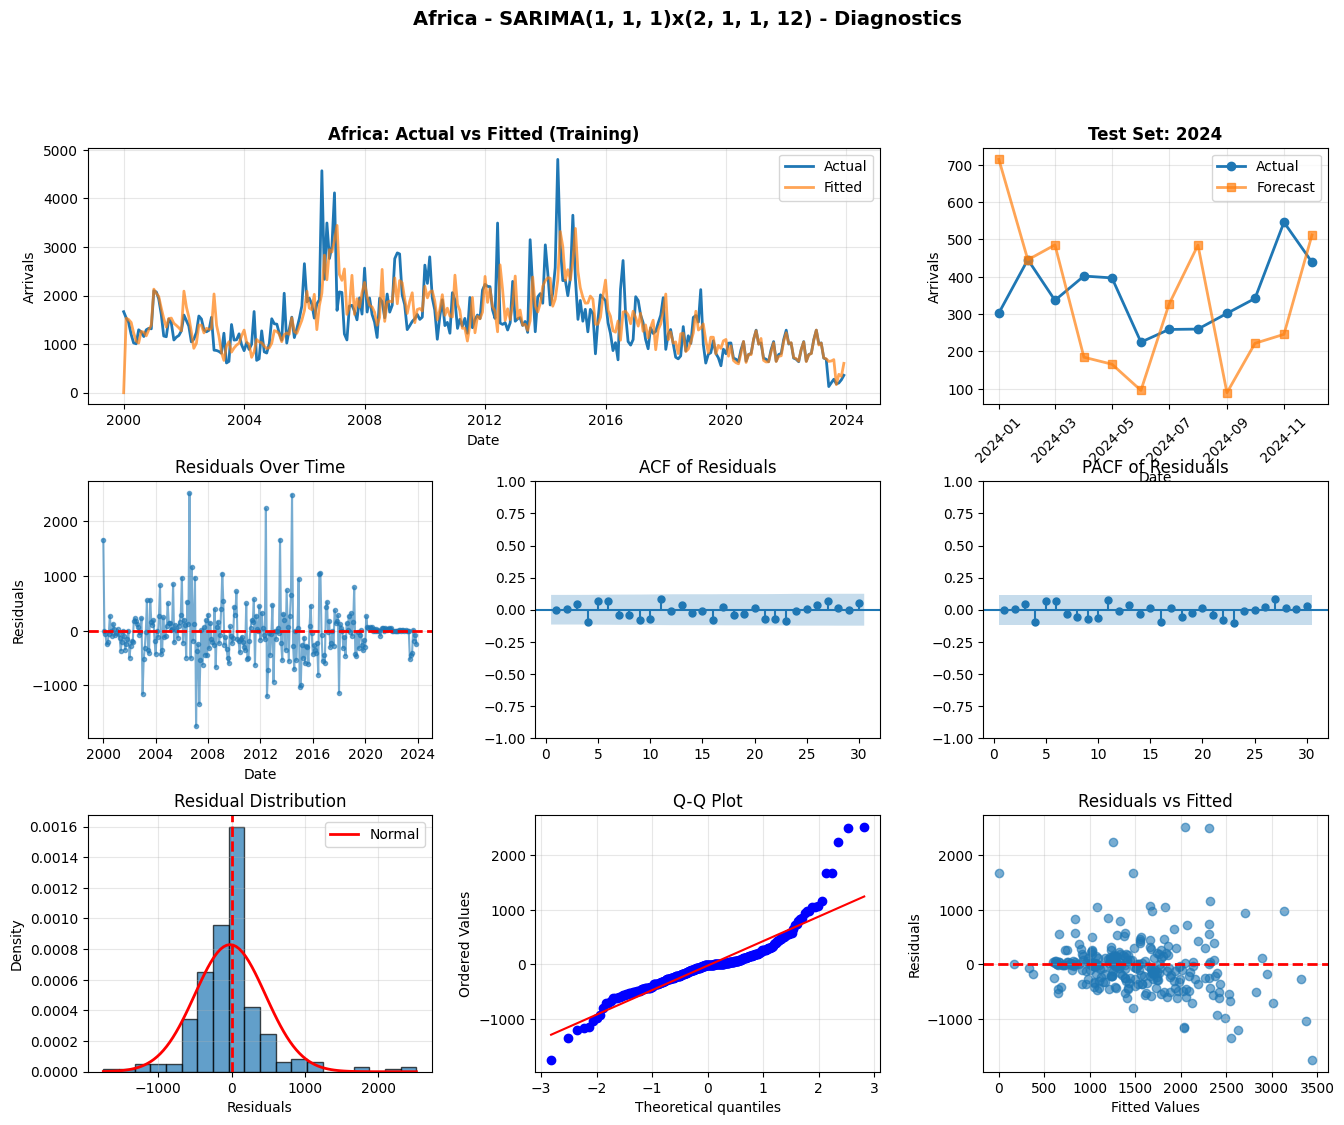


✓ SARIMA model completed for Africa

TARGET: AMERICA_CENTRAL_E_CARIBE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 790.84

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4079.16
  Tested 40/144 models... Best AICc: 4079.16
  Tested 60/144 models... Best AICc: 4079.16
  Tested 80/144 models... Best AICc: 4079.16
  Tested 100/144 models... Best AICc: 4079.16
  Tested 120/144 models... Best AICc: 4076.85
  Tested 140/144 models... Best AICc: 4073.65

✓ Best Model Found: SARIMA(3, 1, 3) x (0, 1, 1, 12)
✓ AICc: 4073.65

--- Test Set Predictions ---
MAE: 334.44
RMSE: 444.73
MAPE: 20.94%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -8.2971
Residual Std: 368.16

T-Test for Zero Mean:
  t-statistic: -0.3825
  p-value: 0.7024
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)


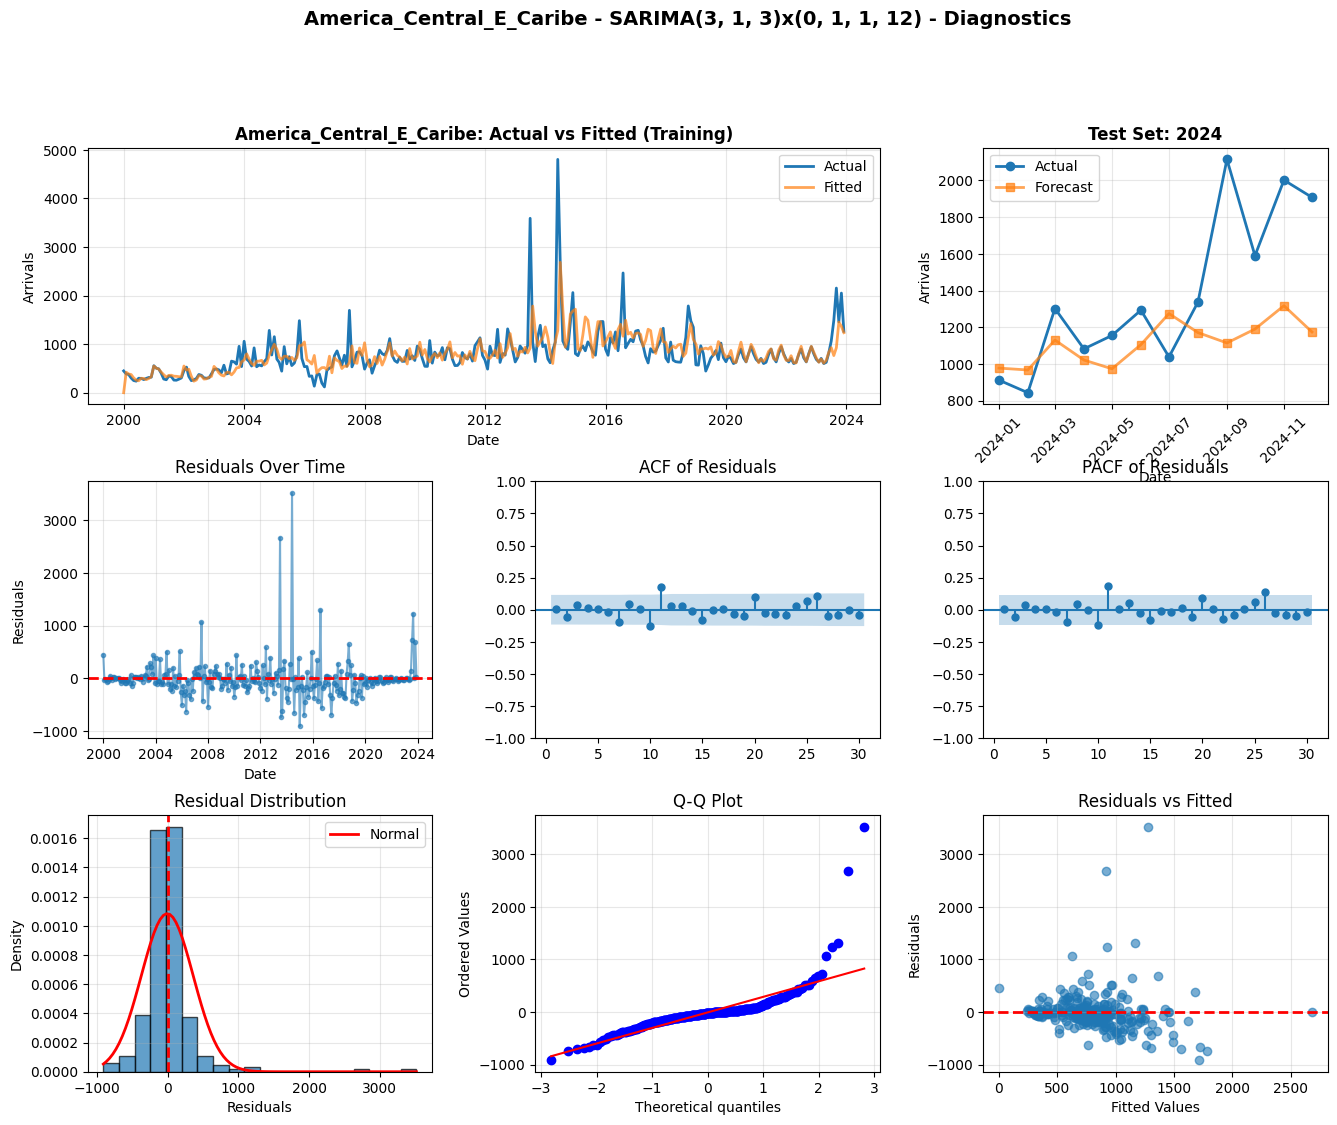


✓ SARIMA model completed for America_Central_E_Caribe

TARGET: AMERICA_DO_NORTE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 15675.83

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5474.55
  Tested 40/144 models... Best AICc: 5474.55
  Tested 60/144 models... Best AICc: 5474.34
  Tested 80/144 models... Best AICc: 5474.34
  Tested 100/144 models... Best AICc: 5474.34
  Tested 120/144 models... Best AICc: 5472.82
  Tested 140/144 models... Best AICc: 5471.90

✓ Best Model Found: SARIMA(3, 1, 3) x (0, 1, 1, 12)
✓ AICc: 5471.90

--- Test Set Predictions ---
MAE: 4515.16
RMSE: 5691.26
MAPE: 22.09%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -444.1484
Residual Std: 4957.77

T-Test for Zero Mean:
  t-statistic: -1.5203
  p-value: 0.1295
  ✓ PASS: Mean não é significativamente diferente de

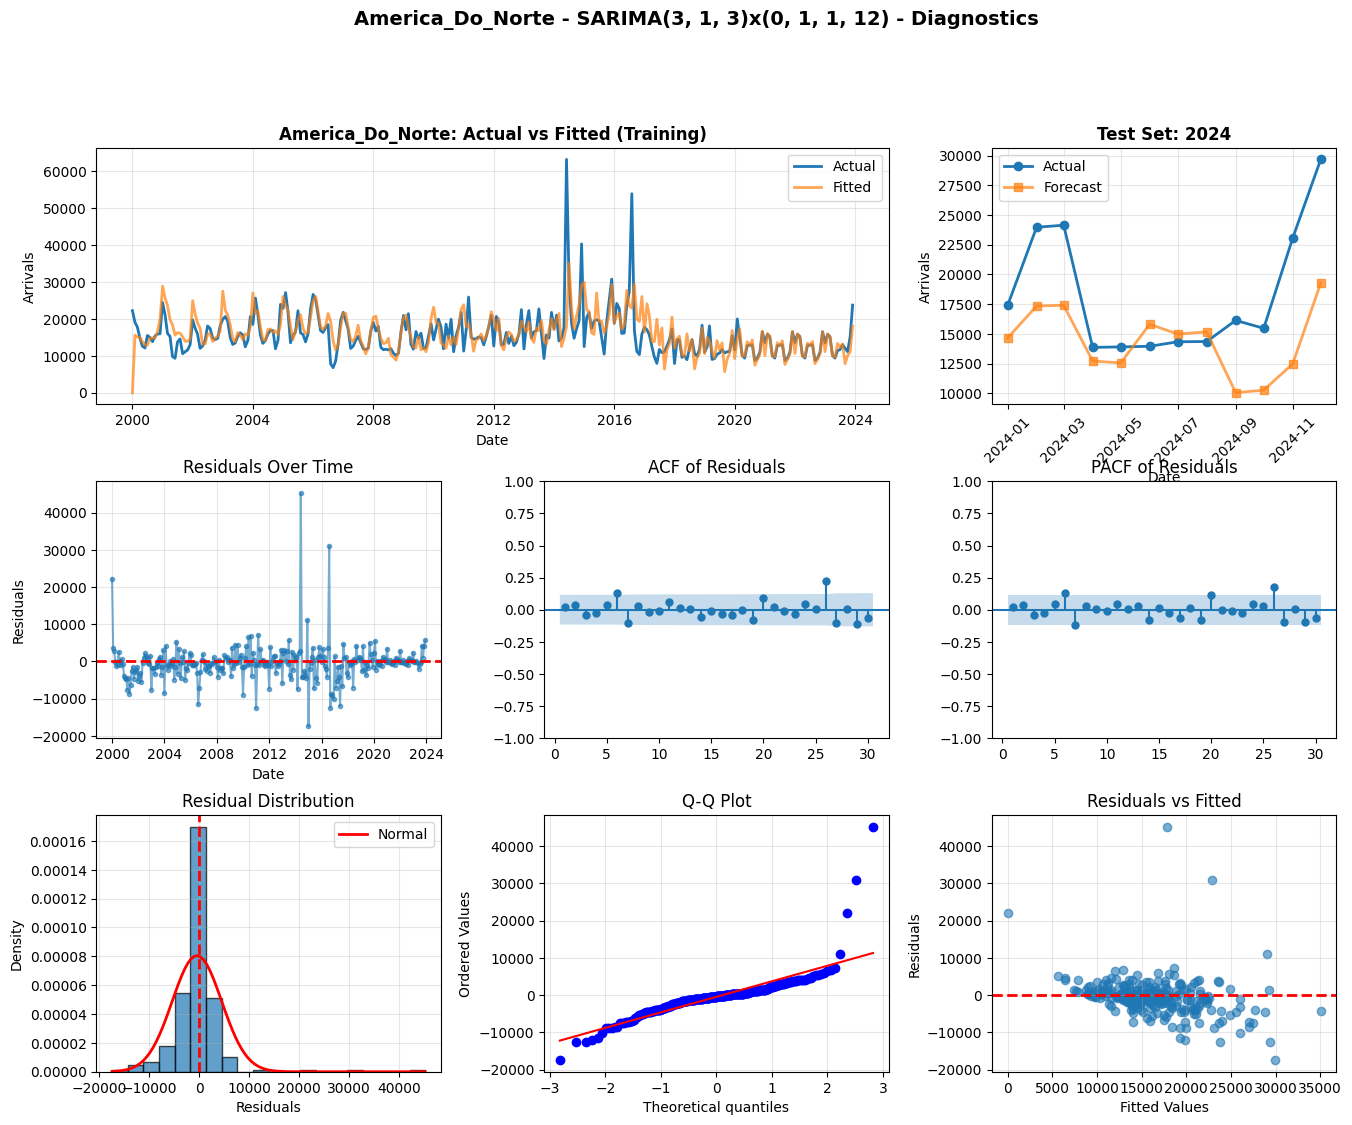


✓ SARIMA model completed for America_Do_Norte

TARGET: AMERICA_DO_SUL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33751.28

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5629.59
  Tested 40/144 models... Best AICc: 5607.85
  Tested 60/144 models... Best AICc: 5599.55
  Tested 80/144 models... Best AICc: 5599.55
  Tested 100/144 models... Best AICc: 5599.55
  Tested 120/144 models... Best AICc: 5591.46
  Tested 140/144 models... Best AICc: 5591.46

✓ Best Model Found: SARIMA(2, 1, 3) x (0, 1, 1, 12)
✓ AICc: 5591.46

--- Test Set Predictions ---
MAE: 16927.09
RMSE: 20126.56
MAPE: 20.33%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -260.3261
Residual Std: 6124.73

T-Test for Zero Mean:
  t-statistic: -0.7213
  p-value: 0.4713
  ✓ PASS: Mean não é significativamente diferente de zero (p

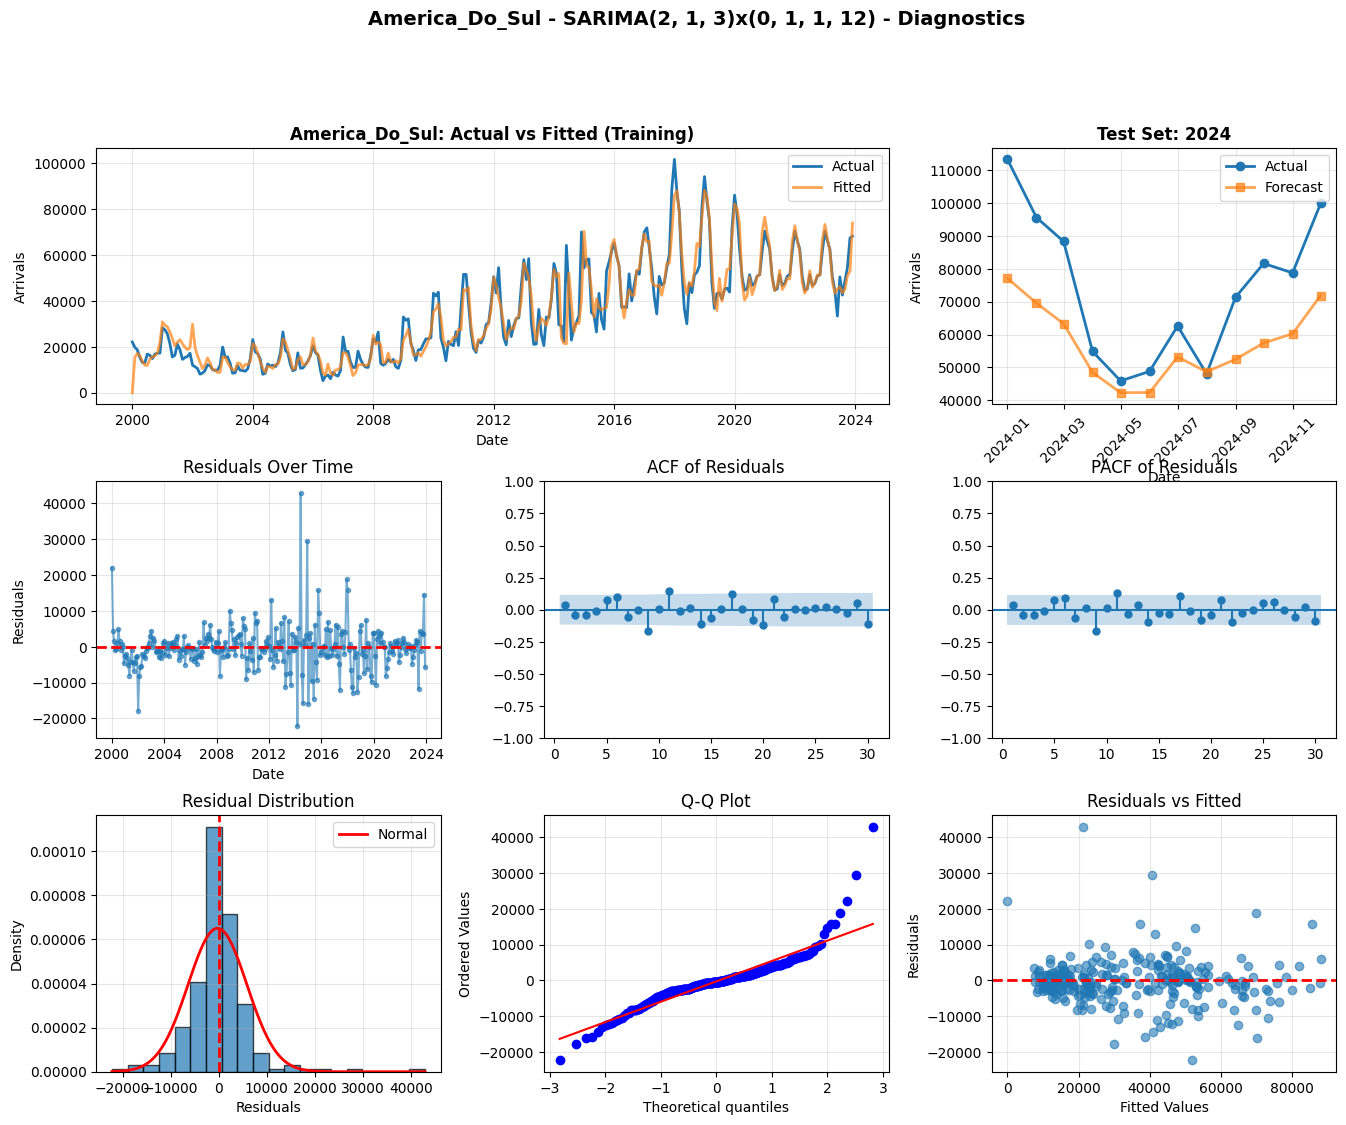


✓ SARIMA model completed for America_Do_Sul

TARGET: ASIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 3174.91

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4789.65
  Tested 40/144 models... Best AICc: 4789.65
  Tested 60/144 models... Best AICc: 4789.65
  Tested 80/144 models... Best AICc: 4789.65
  Tested 100/144 models... Best AICc: 4789.65
  Tested 120/144 models... Best AICc: 4788.82
  Tested 140/144 models... Best AICc: 4788.82

✓ Best Model Found: SARIMA(3, 1, 3) x (1, 1, 2, 12)
✓ AICc: 20.83

--- Test Set Predictions ---
MAE: 134549582.74
RMSE: 134637950.34
MAPE: 5370101.39%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 29850867.8962
Residual Std: 35556892.11

T-Test for Zero Mean:
  t-statistic: 14.2472
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero 

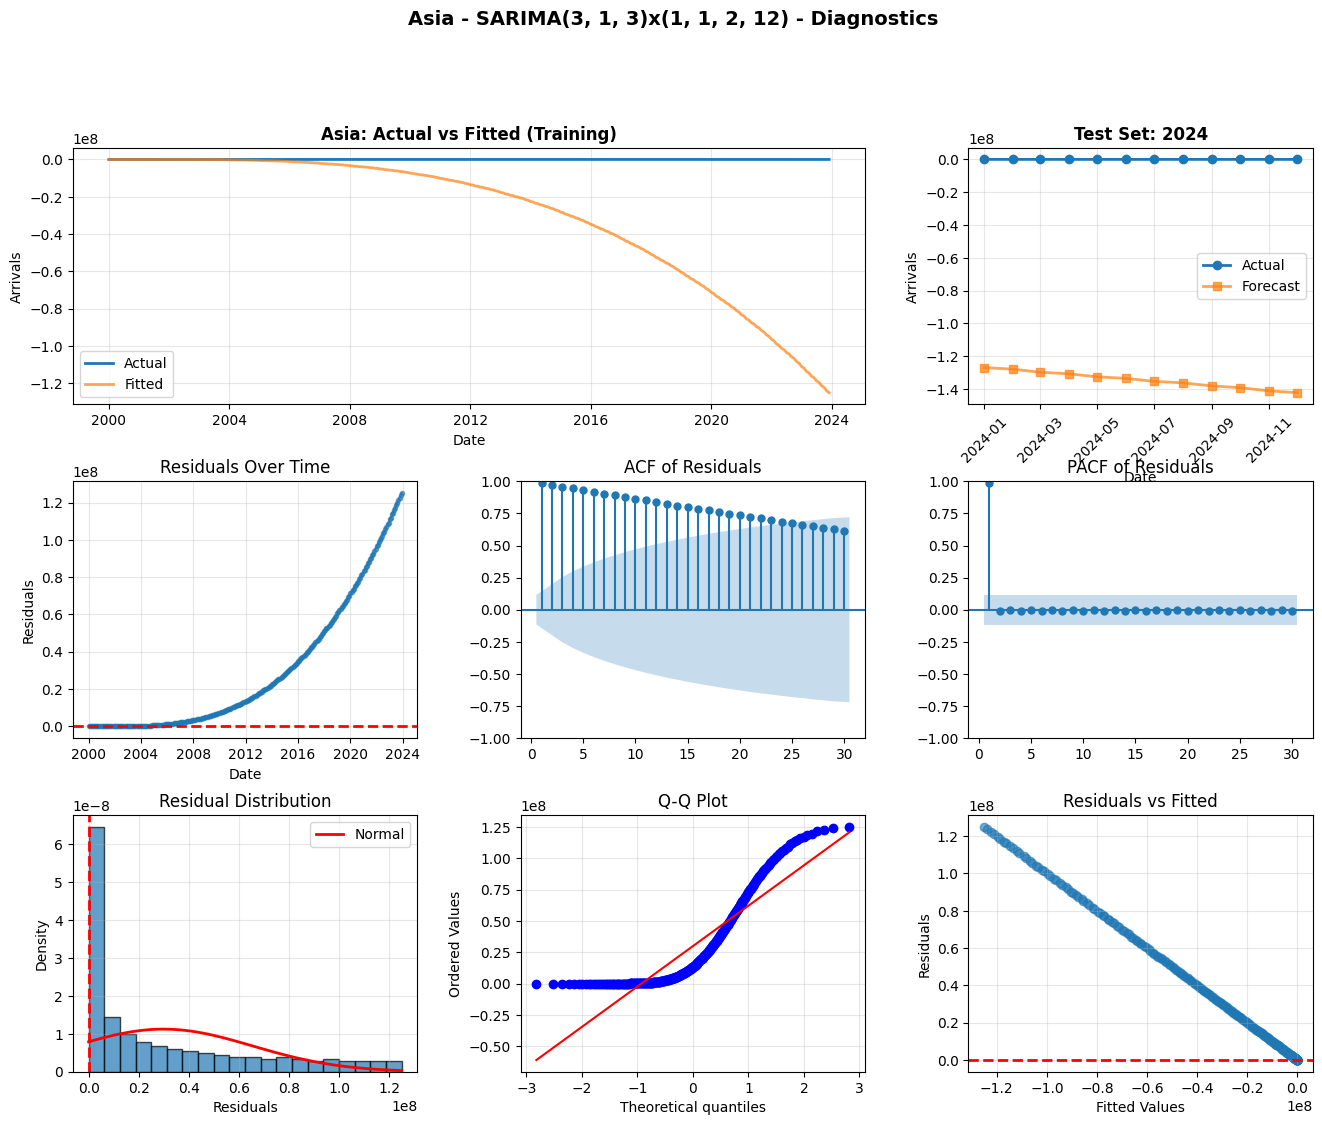


✓ SARIMA model completed for Asia

TARGET: EUROPA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33473.39

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5708.55
  Tested 40/144 models... Best AICc: 5708.55
  Tested 60/144 models... Best AICc: 5703.71
  Tested 80/144 models... Best AICc: 5703.71
  Tested 100/144 models... Best AICc: 5703.71
  Tested 120/144 models... Best AICc: 5703.71
  Tested 140/144 models... Best AICc: 5703.71

✓ Best Model Found: SARIMA(1, 1, 1) x (0, 1, 1, 12)
✓ AICc: 5703.71

--- Test Set Predictions ---
MAE: 6396.68
RMSE: 6929.08
MAPE: 21.79%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -737.8167
Residual Std: 7842.38

T-Test for Zero Mean:
  t-statistic: -1.5966
  p-value: 0.1115
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓ BOM: |Mea

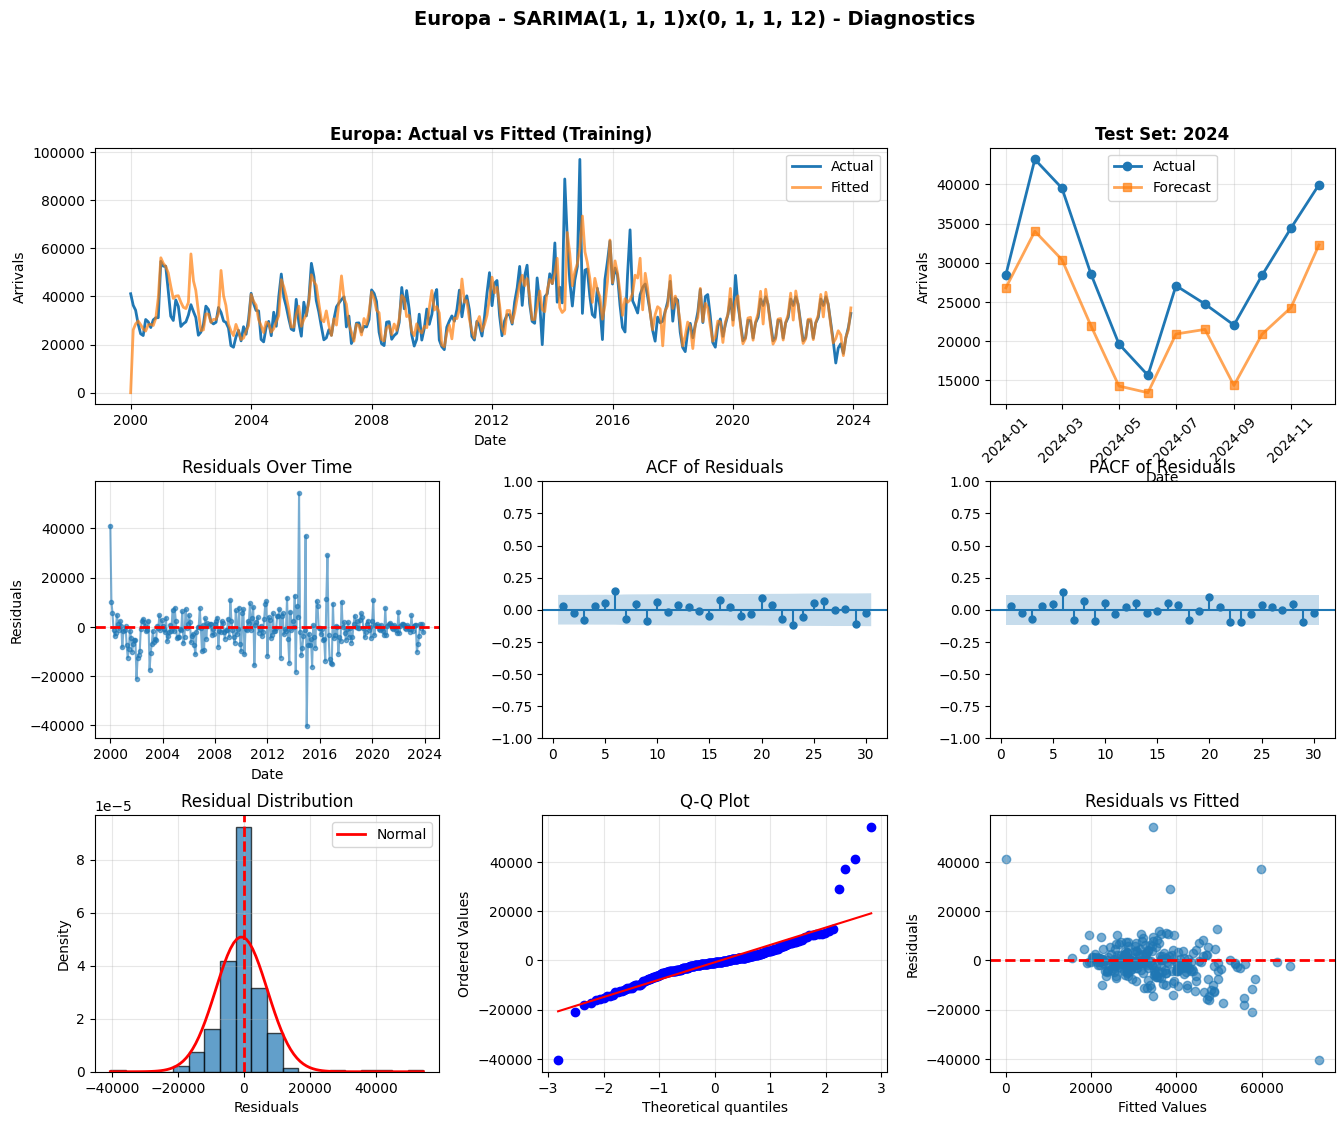


✓ SARIMA model completed for Europa

TARGET: OCEANIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1182.38

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4404.47
  Tested 40/144 models... Best AICc: 4404.47
  Tested 60/144 models... Best AICc: 4404.47
  Tested 80/144 models... Best AICc: 16.54
  Tested 100/144 models... Best AICc: 16.54
  Tested 120/144 models... Best AICc: 16.54
  Tested 140/144 models... Best AICc: 16.54

✓ Best Model Found: SARIMA(1, 1, 3) x (1, 1, 2, 12)
✓ AICc: 16.54

--- Test Set Predictions ---
MAE: 5545042.77
RMSE: 5546292.93
MAPE: 586319.73%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 1795797.2554
Residual Std: 1587272.60

T-Test for Zero Mean:
  t-statistic: 19.2000
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)
  → Model

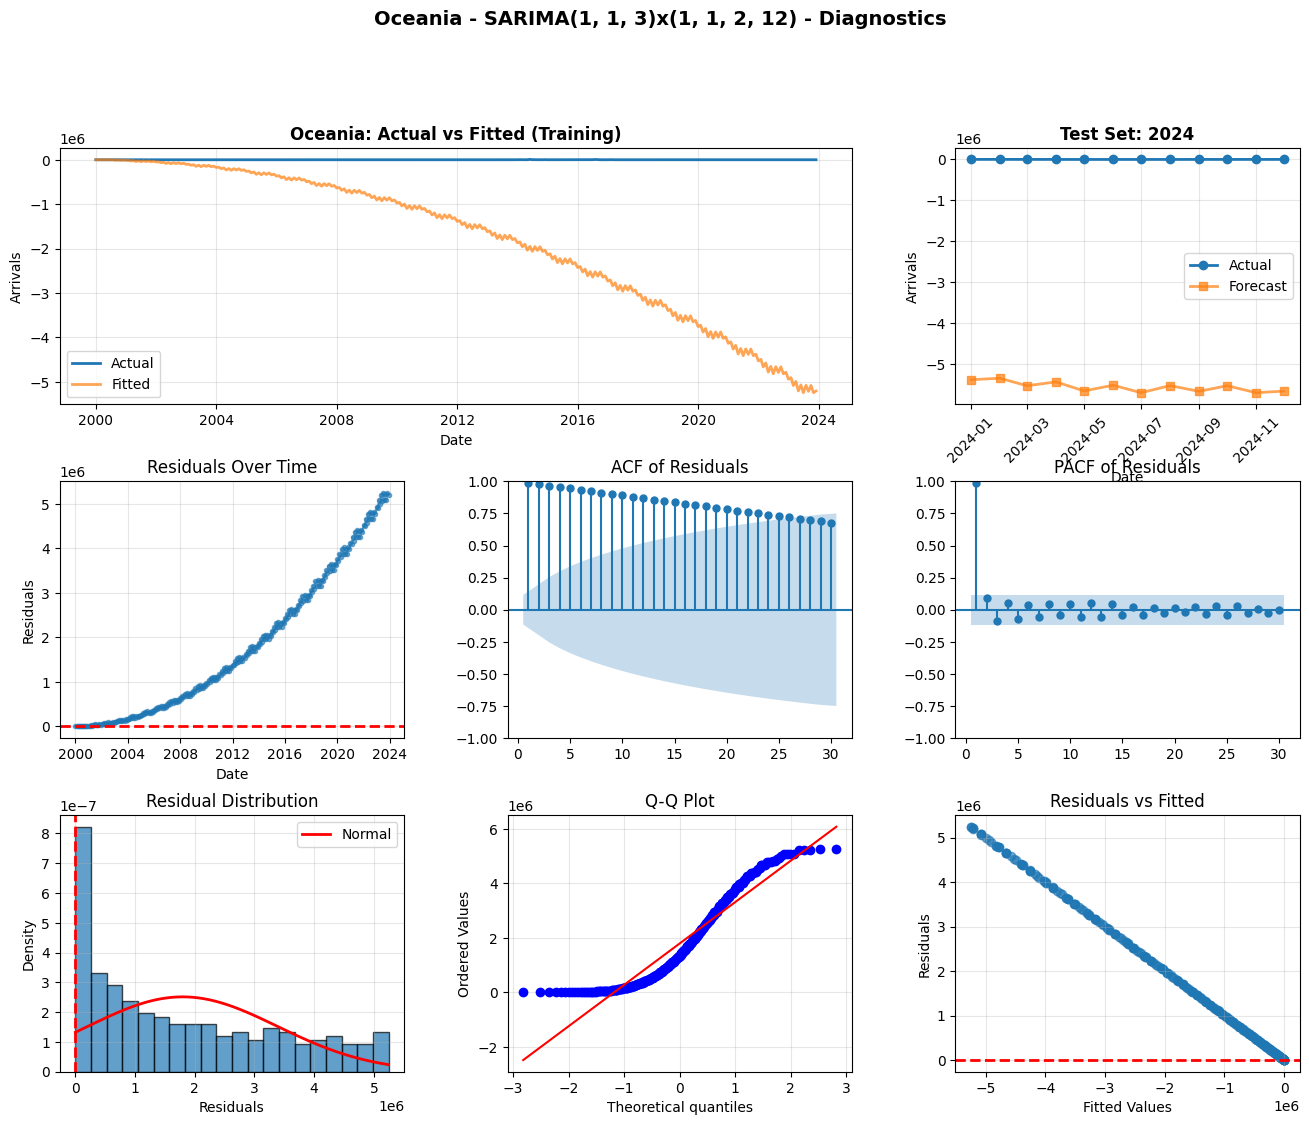


✓ SARIMA model completed for Oceania

TARGET: TOTAL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 89905.16

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 6229.98
  Tested 40/144 models... Best AICc: 6229.98
  Tested 60/144 models... Best AICc: 6229.98
  Tested 80/144 models... Best AICc: 6229.98
  Tested 100/144 models... Best AICc: 6229.98
  Tested 120/144 models... Best AICc: 1484.65
  Tested 140/144 models... Best AICc: 1484.65

✓ Best Model Found: SARIMA(2, 1, 3) x (2, 1, 1, 12)
✓ AICc: 1484.65

--- Test Set Predictions ---
MAE: 18620868500336.54
RMSE: 18650830048508.43
MAPE: 15692815434.50%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -2858277688435.8291
Residual Std: 4278662934436.09

T-Test for Zero Mean:
  t-statistic: -11.3369
  p-value: 0.0000
  ✗ FAIL: Mean é significativam

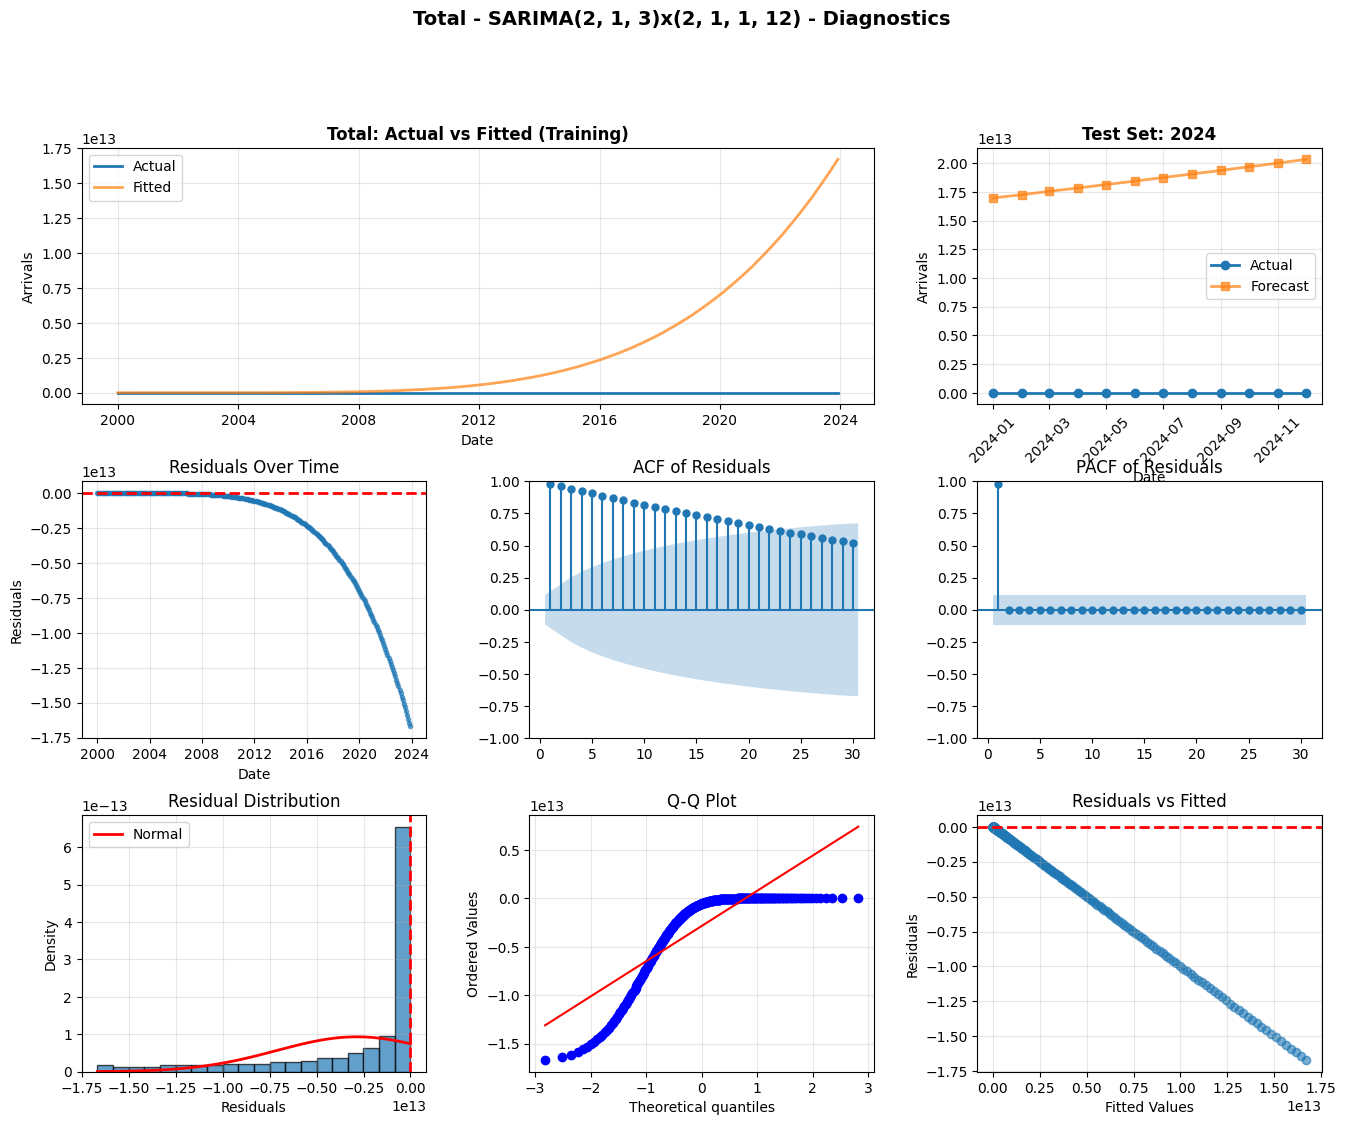


✓ SARIMA model completed for TOTAL

SUMMARY OF SARIMA RESULTS

               Continent                         Model  p  d  q  P  D  Q  s         AIC        AICc         BIC          MAE         RMSE     MAPE (%) Mean_Test LB_Test JB_Test ARCH_Test Overall_Diagnostic  Train_Obs  Test_Obs
                  Africa SARIMA(1, 1, 1)x(2, 1, 1, 12)  1  1  1  2  1  1 12 4194.357102 4194.670534 4216.057728 1.779736e+02 2.078751e+02 5.325903e+01 Excellent    Pass    Fail      Pass          Some Fail        288        12
America_Central_E_Caribe SARIMA(3, 1, 3)x(0, 1, 1, 12)  3  1  3  0  1  1 12 4073.111684 4073.653038 4102.045853 3.344363e+02 4.447297e+02 2.093955e+01 Excellent    Pass    Fail      Pass          Some Fail        288        12
        America_Do_Norte SARIMA(3, 1, 3)x(0, 1, 1, 12)  3  1  3  0  1  1 12 5471.360097 5471.901451 5500.294266 4.515159e+03 5.691256e+03 2.208507e+01      Good    Pass    Fail      Pass          Some Fail        288        12
          America_Do_Sul SAR

In [4]:
## Auto ARIMA (SARIMA without COVID Dummy) - By Continent
## Using statsmodels directly (no pmdarima needed)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(f"=== Auto ARIMA (SARIMA) - No Exogenous Variables ===")
print(f"Train period: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Test period: {test_df['date'].min()} to {test_df['date'].max()}")
print("\n" + "="*80 + "\n")

# Get unique continents
continents = sorted(train_df['continent'].unique())

# Store results
arima_results = []

# Define parameter ranges for grid search
p_range = range(0, 4)
d_range = [1]
q_range = range(0, 4)
P_range = range(0, 3)
D_range = [1]
Q_range = range(0, 3)
s = 12

for continent in continents:
    print(f"\n{'='*80}")
    print(f"TARGET: {continent.upper()}")
    print(f"{'='*80}\n")
    
    # Filter data for this continent
    train_continent = train_df[train_df['continent'] == continent].copy()
    test_continent = test_df[test_df['continent'] == continent].copy()
    
    # Sort and set index
    train_continent = train_continent.sort_values('date').set_index('date')
    test_continent = test_continent.sort_values('date').set_index('date')
    
    # Prepare data (NO exogenous variables)
    y_train = train_continent['actual']
    y_test = test_continent['actual']
    
    print(f"Training observations: {len(y_train)} ({y_train.index.min()} to {y_train.index.max()})")
    print(f"Test observations: {len(y_test)} ({y_test.index.min()} to {y_test.index.max()})")
    print(f"Mean arrivals (train): {y_train.mean():.2f}")
    
    print(f"\n--- Running Grid Search for Best SARIMA Model ---")
    print("This may take a few minutes...")
    
    best_aicc = np.inf
    best_model = None
    best_order = None
    best_seasonal_order = None
    
    # Grid search
    total_models = len(list(product(p_range, d_range, q_range, P_range, D_range, Q_range)))
    model_count = 0
    
    try:
        for p in p_range:
            for d in d_range:
                for q in q_range:
                    for P in P_range:
                        for D in D_range:
                            for Q in Q_range:
                                model_count += 1
                                try:
                                    # ✓ NO exog parameter
                                    model = SARIMAX(
                                        y_train,
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, s),
                                        enforce_stationarity=True,
                                        enforce_invertibility=True
                                    )
                                    
                                    fitted_model = model.fit(disp=False, maxiter=200)
                                    aicc = fitted_model.aicc
                                    
                                    if aicc < best_aicc:
                                        best_aicc = aicc
                                        best_model = fitted_model
                                        best_order = (p, d, q)
                                        best_seasonal_order = (P, D, Q, s)
                                        
                                    if model_count % 20 == 0:
                                        print(f"  Tested {model_count}/{total_models} models... Best AICc: {best_aicc:.2f}")
                                        
                                except:
                                    continue
        
        print(f"\n✓ Best Model Found: SARIMA{best_order} x {best_seasonal_order}")
        print(f"✓ AICc: {best_aicc:.2f}")
        
        # Extract model parameters
        p, d, q = best_order
        P, D, Q, s_param = best_seasonal_order
        aic = best_model.aic
        aicc = best_model.aicc
        bic = best_model.bic
        
        # Make predictions on test set (NO exog)
        print(f"\n--- Test Set Predictions ---")
        forecast = best_model.forecast(steps=len(y_test))

        forecast_df = pd.DataFrame({
            'date': y_test.index,
            'continent': continent,
            'actual': y_test.values,
            'forecast': forecast.values,
            'error': y_test.values - forecast.values
        })

        if 'all_forecasts' not in locals():
            all_forecasts = []
        all_forecasts.append(forecast_df)

        fitted_values = best_model.fittedvalues

        train_forecast_df = pd.DataFrame({
            'date': y_train.index,
            'continent': continent,
            'actual': y_train.values,
            'forecast': fitted_values.values,
            'error': y_train.values - fitted_values.values,
            'abs_error': np.abs(y_train.values - fitted_values.values),
            'pct_error': ((y_train.values - fitted_values.values) / y_train.values) * 100
        })

        if 'all_train_forecasts' not in locals():
            all_train_forecasts = []
        all_train_forecasts.append(train_forecast_df)
        
        # Calculate metrics
        from sklearn.metrics import mean_absolute_error, mean_squared_error
        
        mae = mean_absolute_error(y_test, forecast)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mape = np.mean(np.abs((y_test - forecast) / y_test)) * 100
        
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape:.2f}%")
        
        # Residual diagnostics
        print(f"\n--- Residual Diagnostics (Training Set) ---")
        residuals = best_model.resid
        print(f"Residual Mean: {residuals.mean():.4f}")
        print(f"Residual Std: {residuals.std():.2f}")

        # T-Test for Zero Mean
        print(f"\nT-Test for Zero Mean:")
        from scipy.stats import ttest_1samp
        t_stat, t_pvalue = ttest_1samp(residuals, 0)
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {t_pvalue:.4f}")
        
        threshold_5pct = 0.05 * residuals.std()
        threshold_10pct = 0.10 * residuals.std()
        mean_abs = abs(residuals.mean())
        
        if t_pvalue > 0.05:
            print(f"  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)")
            if mean_abs < threshold_5pct:
                print(f"  ✓✓ EXCELENTE: |Mean| < 5% do Std ({threshold_5pct:.2f})")
                mean_result = "Excellent"
            elif mean_abs < threshold_10pct:
                print(f"  ✓ BOM: |Mean| < 10% do Std ({threshold_10pct:.2f})")
                mean_result = "Good"
            else:
                print(f"  ⚠️ ACEITÁVEL: |Mean| > 10% do Std, mas estatisticamente = 0")
                mean_result = "Acceptable"
        else:
            print(f"  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)")
            if residuals.mean() > 0:
                print(f"  → Modelo SUBESTIMA sistematicamente os valores reais")
            else:
                print(f"  → Modelo SUPERESTIMA sistematicamente os valores reais")
            mean_result = "Biased"
        
        # Ljung-Box Test
        lb_test = acorr_ljungbox(residuals, lags=24, return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].iloc[-1]
        print(f"\nLjung-Box Test (lag 24):")
        print(f"  p-value: {lb_pvalue:.4f}")
        if lb_pvalue > 0.05:
            print(f"  ✓ PASS: No significant autocorrelation (p > 0.05)")
            lb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Significant autocorrelation detected (p < 0.05)")
            lb_result = "Fail"
        
        # Jarque-Bera Test
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)
        print(f"\nJarque-Bera Test (Normality):")
        print(f"  Statistic: {jb_stat:.4f}")
        print(f"  p-value: {jb_pvalue:.4f}")
        if jb_pvalue > 0.05:
            print(f"  ✓ PASS: Residuals are normally distributed (p > 0.05)")
            jb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Residuals are not normally distributed (p < 0.05)")
            jb_result = "Fail"
        
        # ARCH Test
        from statsmodels.stats.diagnostic import het_arch
        try:
            arch_test = het_arch(residuals, nlags=10)
            arch_pvalue = arch_test[1]
            print(f"\nARCH Test (Heteroskedasticity):")
            print(f"  p-value: {arch_pvalue:.4f}")
            if arch_pvalue > 0.05:
                print(f"  ✓ PASS: No heteroskedasticity (p > 0.05)")
                arch_result = "Pass"
            else:
                print(f"  ✗ FAIL: Heteroskedasticity detected (p < 0.05)")
                arch_result = "Fail"
        except:
            arch_result = "Error"
            print(f"\nARCH Test: Could not be performed")
        
        # Overall diagnostic result
        print(f"\n--- Overall Residual Diagnostics ---")
        all_pass = all([lb_result == "Pass", jb_result == "Pass", arch_result == "Pass"])
        if all_pass:
            print("✓✓✓ ALL TESTS PASSED - Model residuals are well-behaved")
            diagnostic_result = "All Pass"
        else:
            print("⚠️ SOME TESTS FAILED - Review residual diagnostics")
            diagnostic_result = "Some Fail"
        
        # Plot diagnostics
        fig = plt.figure(figsize=(16, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
        
        # Plot 1: Fitted vs Actual (Training)
        ax1 = fig.add_subplot(gs[0, :2])
        fitted = best_model.fittedvalues
        ax1.plot(y_train.index, y_train.values, label='Actual', linewidth=2)
        ax1.plot(y_train.index, fitted, label='Fitted', linewidth=2, alpha=0.7)
        ax1.set_title(f'{continent.title()}: Actual vs Fitted (Training)', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Arrivals')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Forecast vs Actual (Test)
        ax2 = fig.add_subplot(gs[0, 2])
        ax2.plot(y_test.index, y_test.values, label='Actual', linewidth=2, marker='o')
        ax2.plot(y_test.index, forecast, label='Forecast', linewidth=2, alpha=0.7, marker='s')
        ax2.set_title(f'Test Set: 2024', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Arrivals')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        # Plot 3: Residuals over time
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.plot(residuals.index, residuals, marker='o', markersize=3, alpha=0.6)
        ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax3.set_title('Residuals Over Time')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Residuals')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: ACF of Residuals
        ax4 = fig.add_subplot(gs[1, 1])
        plot_acf(residuals, lags=30, ax=ax4, zero=False)
        ax4.set_title('ACF of Residuals')
        
        # Plot 5: PACF of Residuals
        ax5 = fig.add_subplot(gs[1, 2])
        plot_pacf(residuals, lags=30, ax=ax5, zero=False)
        ax5.set_title('PACF of Residuals')
        
        # Plot 6: Histogram of Residuals
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.hist(residuals, bins=20, alpha=0.7, edgecolor='black', density=True)
        ax6.axvline(x=0, color='r', linestyle='--', linewidth=2)
        # Add normal distribution overlay
        mu, sigma = residuals.mean(), residuals.std()
        x = np.linspace(residuals.min(), residuals.max(), 100)
        ax6.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
        ax6.set_title('Residual Distribution')
        ax6.set_xlabel('Residuals')
        ax6.set_ylabel('Density')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        
        # Plot 7: Q-Q Plot
        ax7 = fig.add_subplot(gs[2, 1])
        stats.probplot(residuals, dist="norm", plot=ax7)
        ax7.set_title('Q-Q Plot')
        ax7.grid(True, alpha=0.3)
        
        # Plot 8: Residuals vs Fitted
        ax8 = fig.add_subplot(gs[2, 2])
        ax8.scatter(fitted, residuals, alpha=0.6)
        ax8.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax8.set_xlabel('Fitted Values')
        ax8.set_ylabel('Residuals')
        ax8.set_title('Residuals vs Fitted')
        ax8.grid(True, alpha=0.3)
        
        plt.suptitle(f'{continent.title()} - SARIMA{best_order}x{best_seasonal_order} - Diagnostics', 
                     fontsize=14, fontweight='bold', y=0.995)
        plt.show()
        
        # Store results
        arima_results.append({
            'Continent': continent,
            'Model': f'SARIMA{best_order}x{best_seasonal_order}',
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q, 's': s_param,
            'AIC': aic,
            'AICc': aicc,
            'BIC': bic,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'Mean_Test': mean_result,
            'LB_Test': lb_result,
            'JB_Test': jb_result,
            'ARCH_Test': arch_result,
            'Overall_Diagnostic': diagnostic_result,
            'Train_Obs': len(y_train),
            'Test_Obs': len(y_test)
        })
        
        print(f"\n✓ SARIMA model completed for {continent}")
        
    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()
        arima_results.append({
            'Continent': continent,
            'Model': 'Error',
            'p': np.nan, 'd': np.nan, 'q': np.nan,
            'P': np.nan, 'D': np.nan, 'Q': np.nan, 's': np.nan,
            'AIC': np.nan,
            'AICc': np.nan,
            'BIC': np.nan,
            'MAE': np.nan,
            'RMSE': np.nan,
            'MAPE (%)': np.nan,
            'Mean_Test': 'Error',
            'LB_Test': 'Error',
            'JB_Test': 'Error',
            'ARCH_Test': 'Error',
            'Overall_Diagnostic': 'Error',
            'Train_Obs': np.nan,
            'Test_Obs': np.nan
        })
        continue

# Summary
print("\n" + "="*80)
print("SUMMARY OF SARIMA RESULTS")
print("="*80 + "\n")

results_df = pd.DataFrame(arima_results)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("PERFORMANCE METRICS RANKING")
print("="*80 + "\n")

print("Best models by RMSE (lower is better):")
print(results_df.sort_values('RMSE')[['Continent', 'Model', 'RMSE', 'MAE', 'MAPE (%)']].to_string(index=False))

print("\n" + "="*80)
print("✓ SARIMA modeling completed for all continents")
print("="*80)

print("\n" + "="*80)
print("Notes:")
print("- SARIMA(p,d,q)x(P,D,Q,s) where s=12 (monthly seasonality)")
print("- AICc: Corrected AIC (better for small samples)")
print("- MAE: Mean Absolute Error")
print("- RMSE: Root Mean Squared Error")
print("- MAPE: Mean Absolute Percentage Error")
print("- LB_Test: Ljung-Box (autocorrelation) - Pass means no autocorrelation")
print("- JB_Test: Jarque-Bera (normality) - Pass means residuals are normal")
print("- ARCH_Test: Heteroskedasticity - Pass means constant variance")
print("- Lower RMSE/MAE/MAPE = Better predictions")
print("- Lower AICc/BIC = Better model fit")
print("="*80)

if 'all_forecasts' in locals() and len(all_forecasts) > 0:
    forecasts_final = pd.concat(all_forecasts, ignore_index=True)
    output_path = PROJECT_ROOT / "notebooks" / "modeling" / "11_sarima_forecasts_TEST.csv"
    forecasts_final.to_csv(output_path, index=False)
    print(f"\n✓ Test forecasts saved: {output_path}")

if 'all_train_forecasts' in locals() and len(all_train_forecasts) > 0:
    train_forecasts_final = pd.concat(all_train_forecasts, ignore_index=True)
    output_path_train = PROJECT_ROOT / "notebooks" / "modeling" / "11_sarima_forecasts_TRAIN.csv"
    train_forecasts_final.to_csv(output_path_train, index=False)
    print(f"✓ Train fitted values saved: {output_path_train}")

=== Auto ARIMA (SARIMA) - No Exogenous Variables ===
Train period: 2000-01-01 00:00:00 to 2023-12-01 00:00:00
Test period: 2024-01-01 00:00:00 to 2024-12-01 00:00:00



TARGET: AFRICA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1460.01

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4363.38
  Tested 40/144 models... Best AICc: 4360.97
  Tested 60/144 models... Best AICc: 4359.29
  Tested 80/144 models... Best AICc: 4359.29
  Tested 100/144 models... Best AICc: 4359.29
  Tested 120/144 models... Best AICc: 4358.76
  Tested 140/144 models... Best AICc: 4358.76

✓ Best Model Found: SARIMA(2, 1, 3) x (2, 0, 0, 12)
✓ AICc: 4358.76

--- Test Set Predictions ---
MAE: 178.90
RMSE: 198.42
MAPE: 58.56%

--- Residual Diagnostics (Training Set) ---
Residual Mean: -11.3249
Residual Std: 475.51

T-Test for Zero M

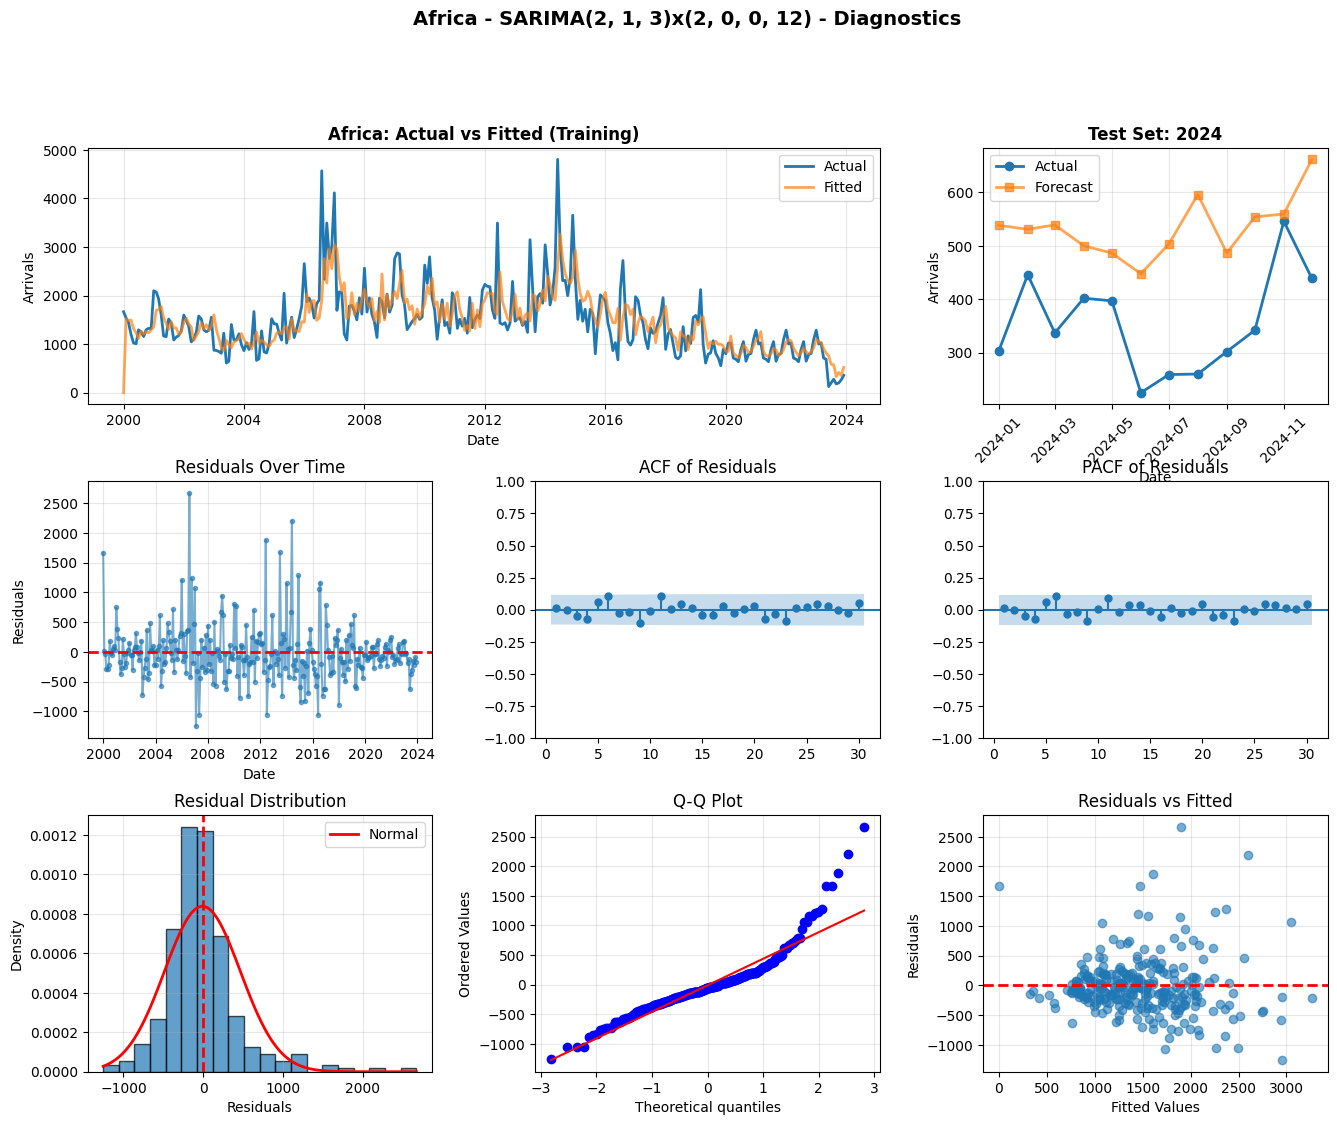


✓ SARIMA model completed for Africa

TARGET: AMERICA_CENTRAL_E_CARIBE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 790.84

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4229.25
  Tested 40/144 models... Best AICc: 4228.57
  Tested 60/144 models... Best AICc: 4228.57
  Tested 80/144 models... Best AICc: 4228.57
  Tested 100/144 models... Best AICc: 4228.57
  Tested 120/144 models... Best AICc: 4228.57
  Tested 140/144 models... Best AICc: 4221.15

✓ Best Model Found: SARIMA(3, 1, 3) x (1, 0, 1, 12)
✓ AICc: 4221.15

--- Test Set Predictions ---
MAE: 369.44
RMSE: 486.81
MAPE: 22.91%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 16.9378
Residual Std: 364.50

T-Test for Zero Mean:
  t-statistic: 0.7886
  p-value: 0.4310
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
 

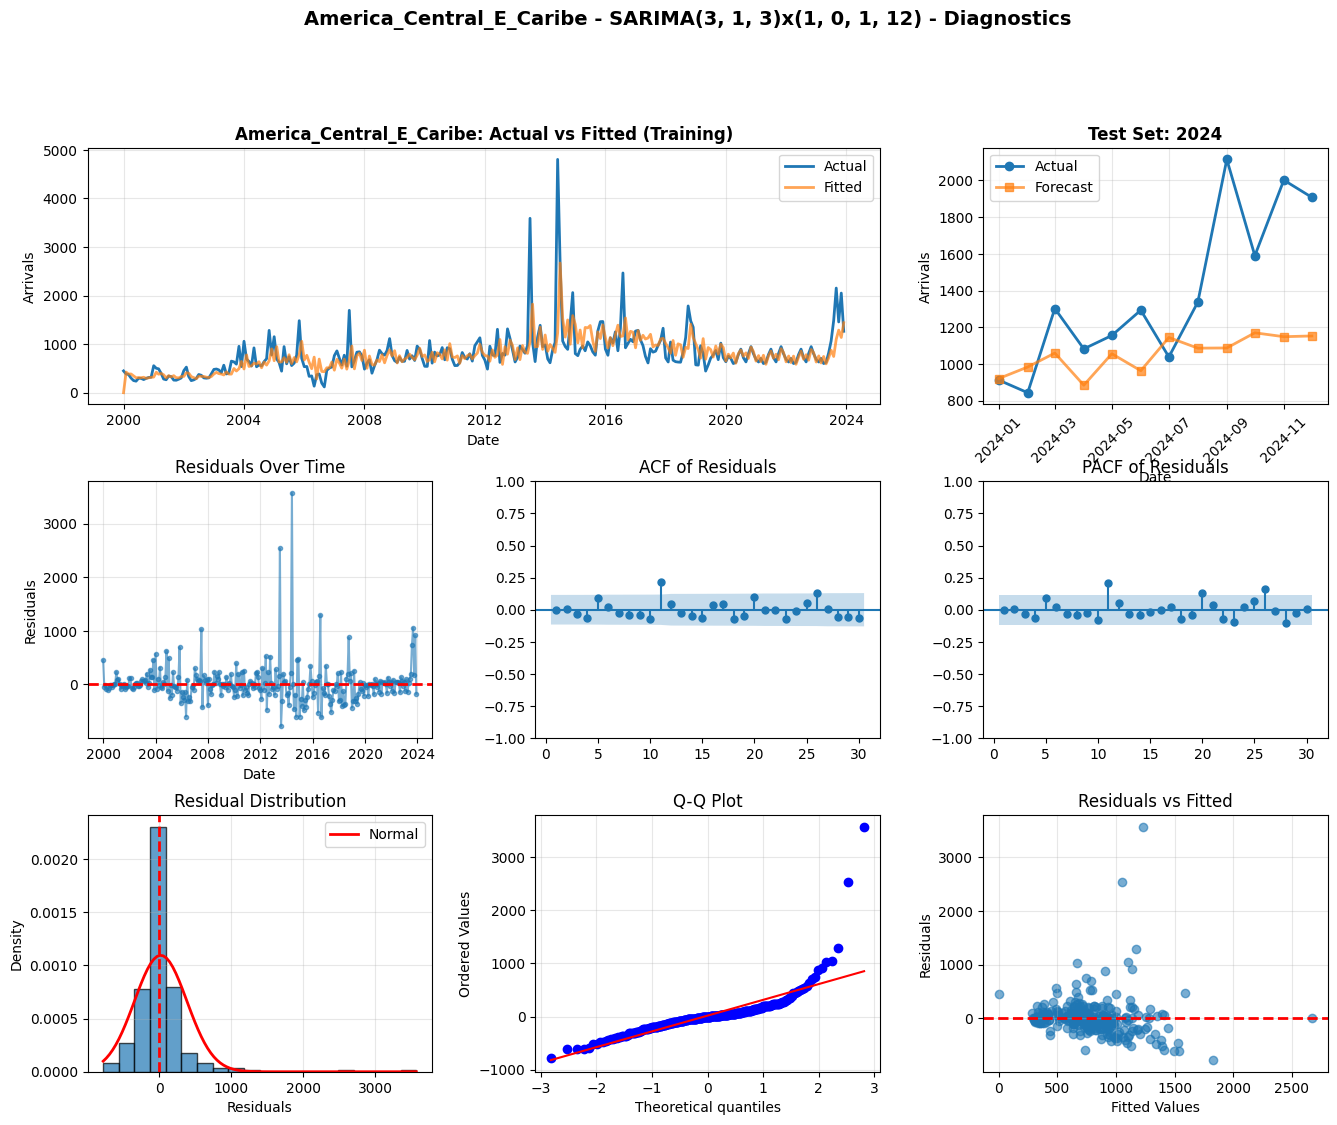


✓ SARIMA model completed for America_Central_E_Caribe

TARGET: AMERICA_DO_NORTE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 15675.83

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5705.72
  Tested 40/144 models... Best AICc: 5691.02
  Tested 60/144 models... Best AICc: 5688.58
  Tested 80/144 models... Best AICc: 5688.58
  Tested 100/144 models... Best AICc: 5688.58
  Tested 120/144 models... Best AICc: 5688.58
  Tested 140/144 models... Best AICc: 5688.58

✓ Best Model Found: SARIMA(3, 1, 3) x (1, 0, 2, 12)
✓ AICc: 5685.66

--- Test Set Predictions ---
MAE: 4625.90
RMSE: 6062.53
MAPE: 21.92%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 69.1170
Residual Std: 4822.66

T-Test for Zero Mean:
  t-statistic: 0.2432
  p-value: 0.8080
  ✓ PASS: Mean não é significativamente diferente de ze

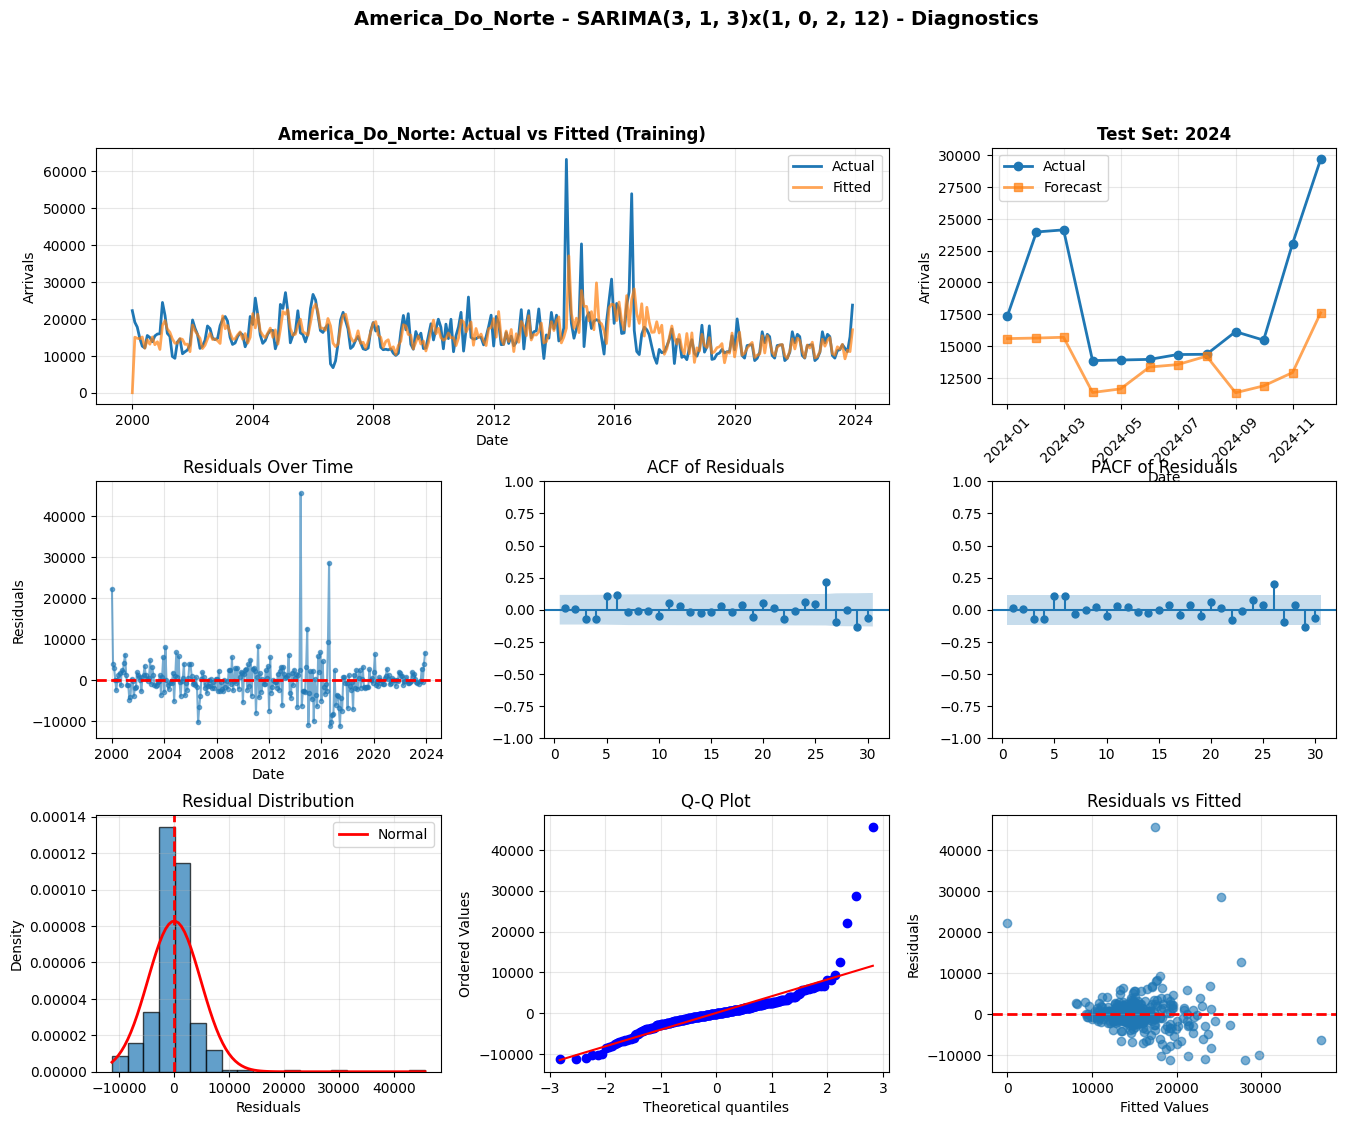


✓ SARIMA model completed for America_Do_Norte

TARGET: AMERICA_DO_SUL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33751.28

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5875.61
  Tested 40/144 models... Best AICc: 5853.03
  Tested 60/144 models... Best AICc: 5842.00
  Tested 80/144 models... Best AICc: 5842.00
  Tested 100/144 models... Best AICc: 5840.03
  Tested 120/144 models... Best AICc: 5833.91
  Tested 140/144 models... Best AICc: 5833.91

✓ Best Model Found: SARIMA(2, 1, 3) x (1, 0, 1, 12)
✓ AICc: 5833.91

--- Test Set Predictions ---
MAE: 17853.87
RMSE: 21394.65
MAPE: 21.29%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 144.2786
Residual Std: 6153.46

T-Test for Zero Mean:
  t-statistic: 0.3979
  p-value: 0.6910
  ✓ PASS: Mean não é significativamente diferente de zero (p >

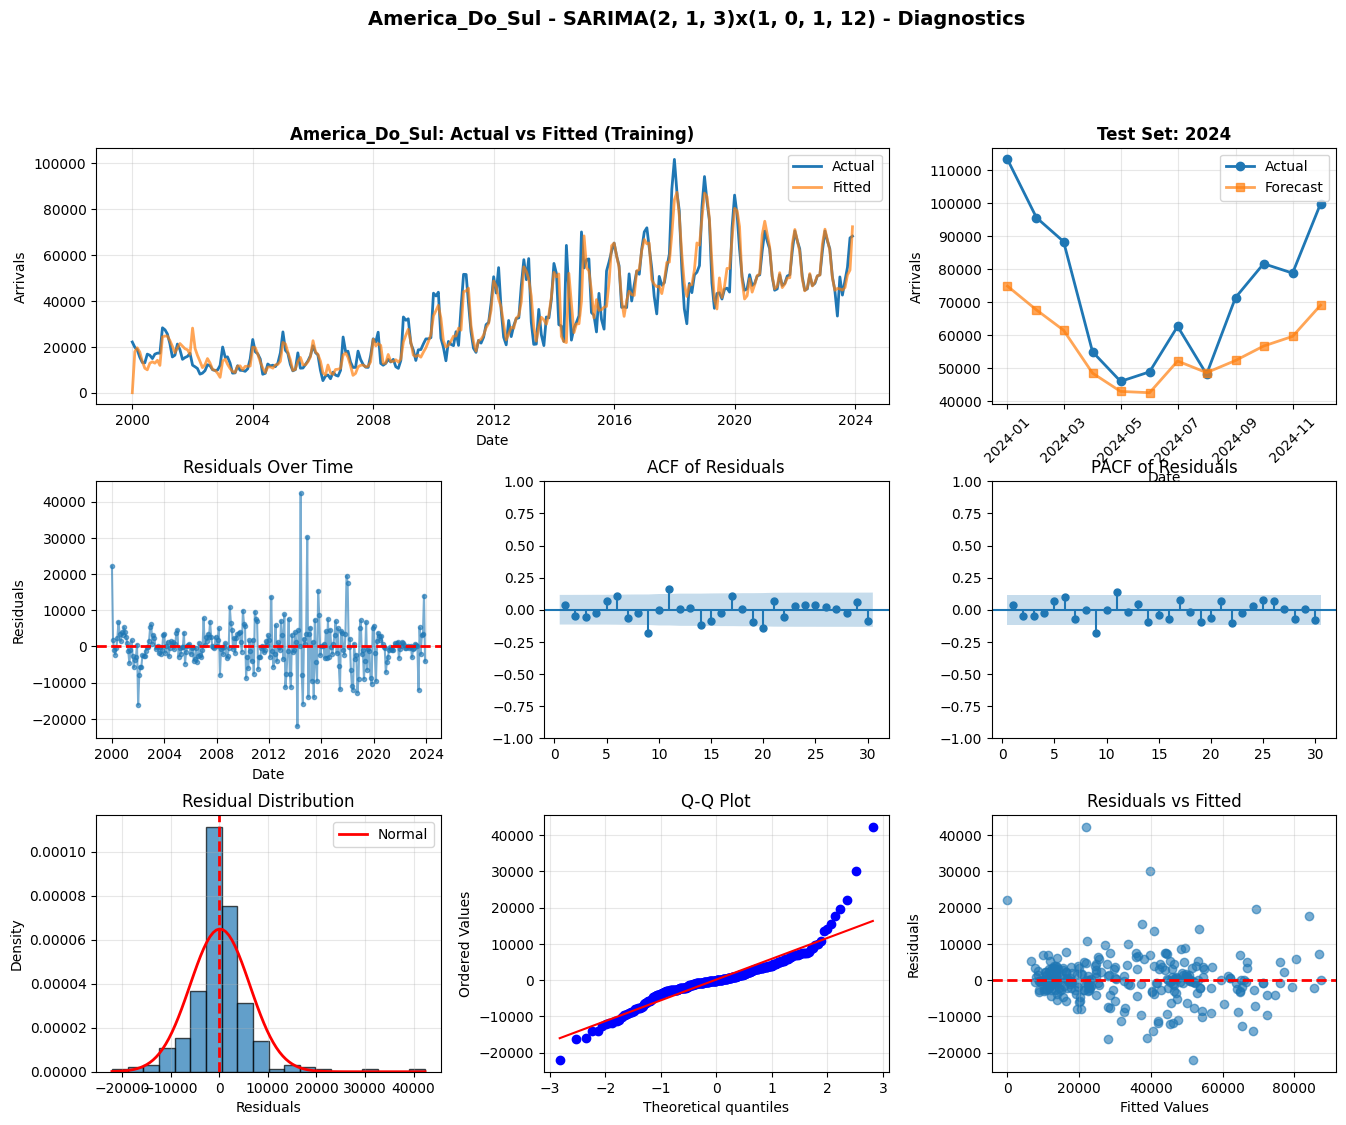


✓ SARIMA model completed for America_Do_Sul

TARGET: ASIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 3174.91

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4976.80
  Tested 40/144 models... Best AICc: 4971.88
  Tested 60/144 models... Best AICc: 4971.88
  Tested 80/144 models... Best AICc: 4970.91
  Tested 100/144 models... Best AICc: 4970.91
  Tested 120/144 models... Best AICc: 4970.91
  Tested 140/144 models... Best AICc: 4970.91

✓ Best Model Found: SARIMA(1, 1, 3) x (1, 0, 1, 12)
✓ AICc: 4970.91

--- Test Set Predictions ---
MAE: 647.44
RMSE: 958.15
MAPE: 21.94%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 9.4584
Residual Std: 1367.06

T-Test for Zero Mean:
  t-statistic: 0.1174
  p-value: 0.9066
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCELEN

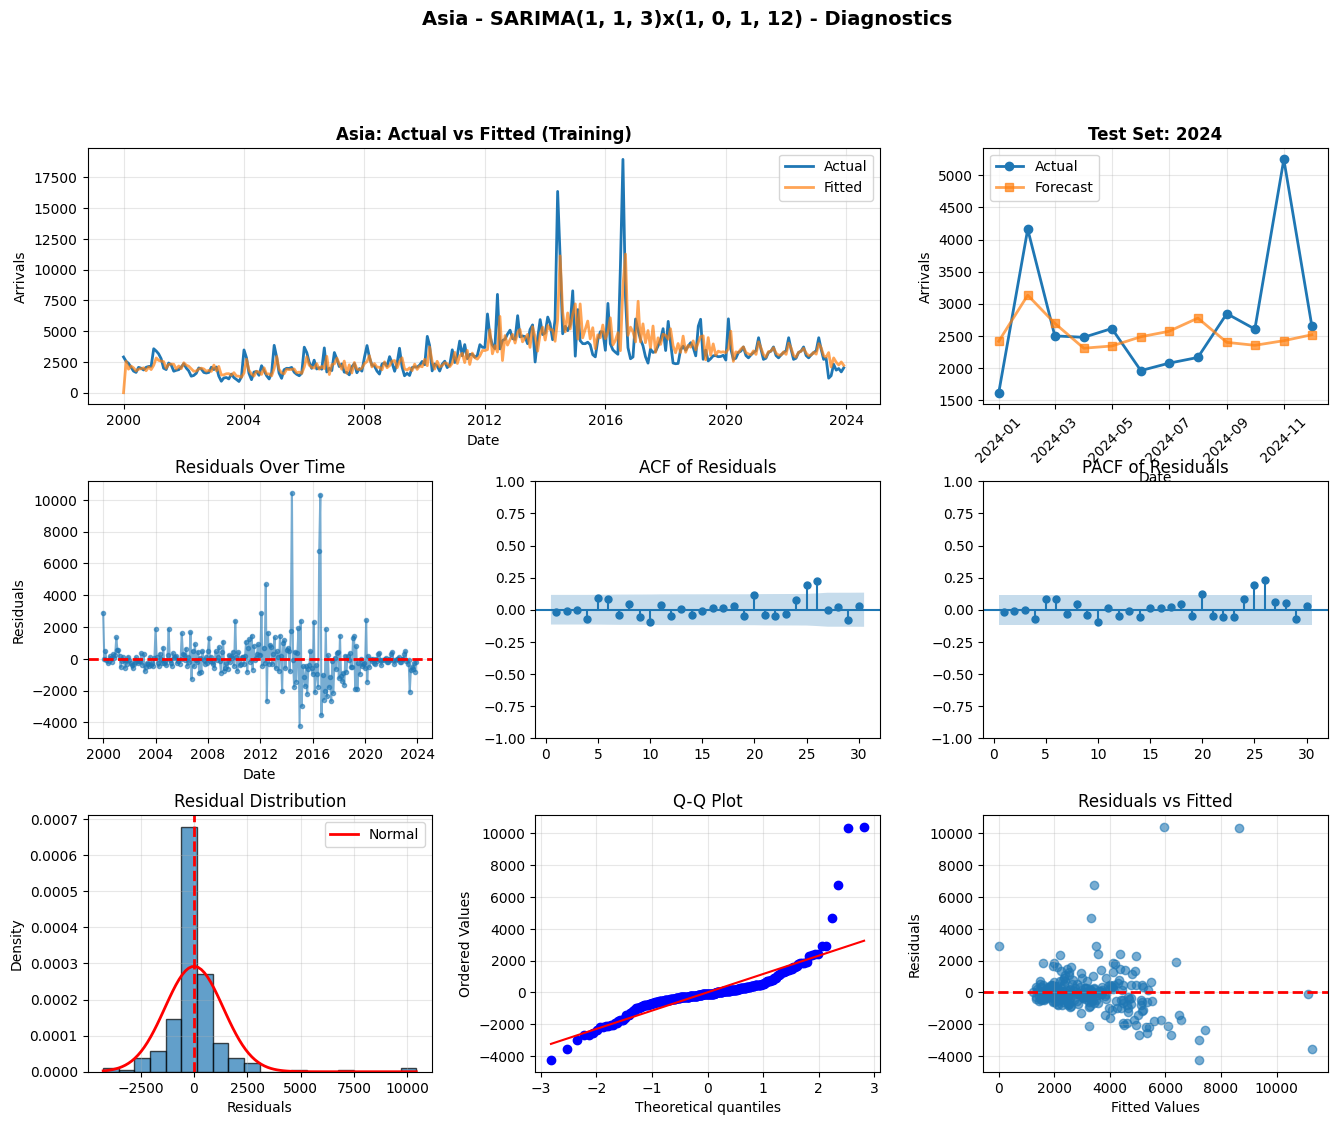


✓ SARIMA model completed for Asia

TARGET: EUROPA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33473.39

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5945.67
  Tested 40/144 models... Best AICc: 5934.12
  Tested 60/144 models... Best AICc: 5934.12
  Tested 80/144 models... Best AICc: 5934.12
  Tested 100/144 models... Best AICc: 5934.12
  Tested 120/144 models... Best AICc: 5934.12
  Tested 140/144 models... Best AICc: 5934.12

✓ Best Model Found: SARIMA(0, 1, 2) x (1, 0, 1, 12)
✓ AICc: 5934.12

--- Test Set Predictions ---
MAE: 5331.48
RMSE: 6327.90
MAPE: 16.68%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 1.0428
Residual Std: 7701.10

T-Test for Zero Mean:
  t-statistic: 0.0023
  p-value: 0.9982
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCELENTE: |

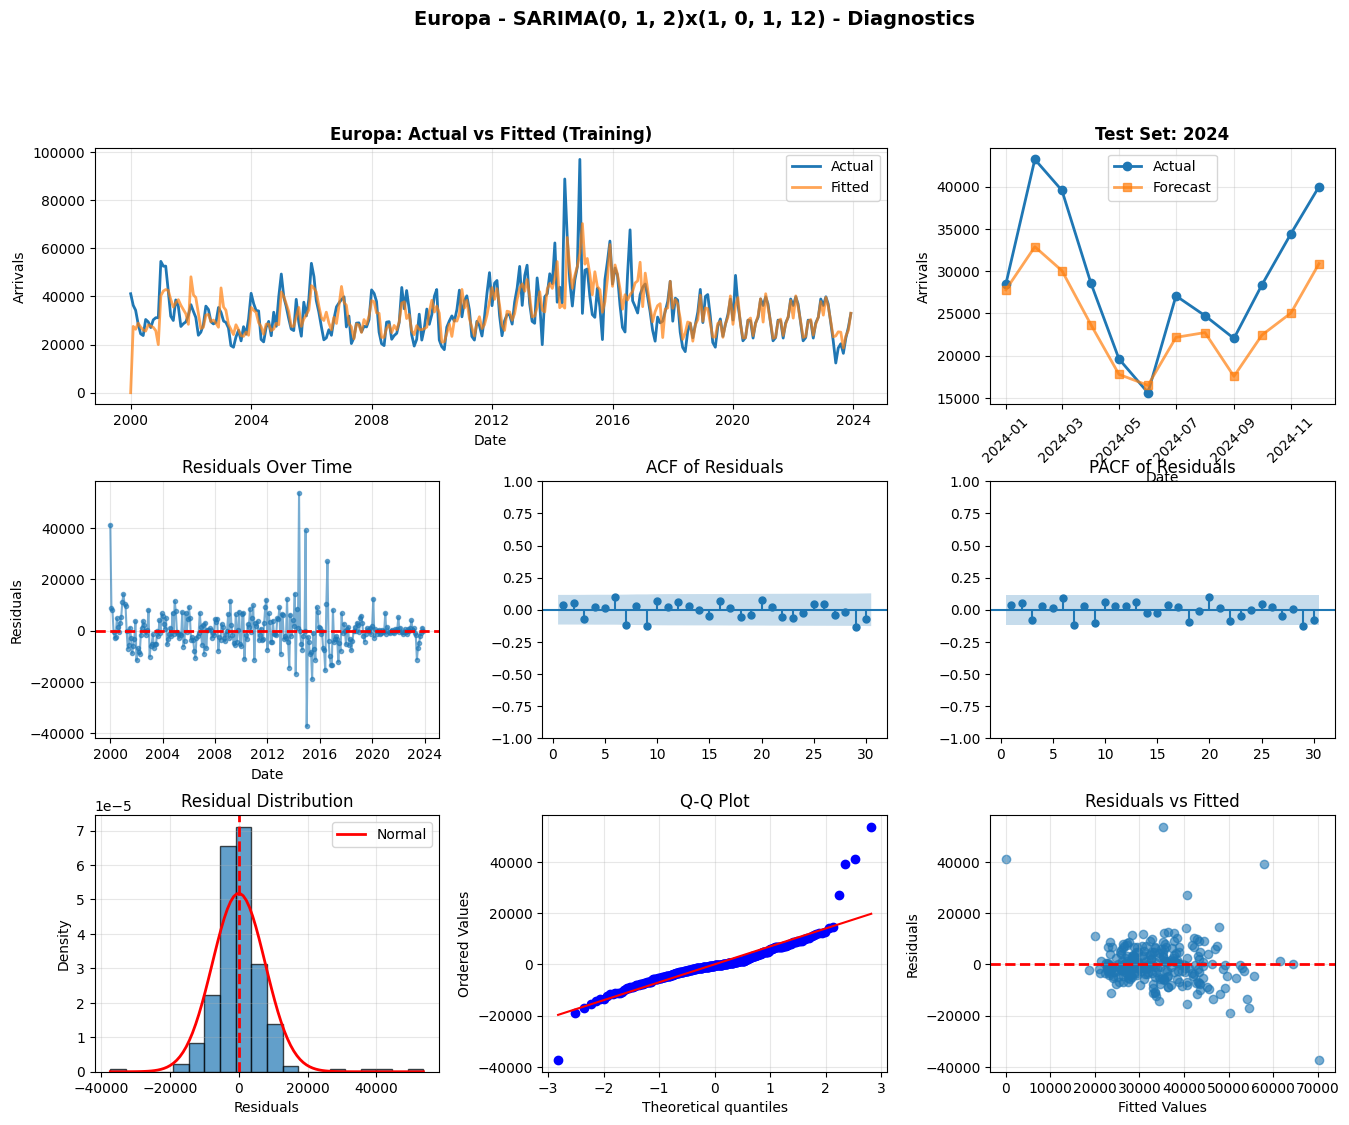


✓ SARIMA model completed for Europa

TARGET: OCEANIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1182.38

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4581.24
  Tested 40/144 models... Best AICc: 4575.53
  Tested 60/144 models... Best AICc: 4575.53
  Tested 80/144 models... Best AICc: 4575.53
  Tested 100/144 models... Best AICc: 4575.53
  Tested 120/144 models... Best AICc: 16.52
  Tested 140/144 models... Best AICc: 16.52

✓ Best Model Found: SARIMA(2, 1, 3) x (1, 0, 1, 12)
✓ AICc: 16.52

--- Test Set Predictions ---
MAE: 1145.17
RMSE: 1243.87
MAPE: 100.00%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 1182.3786
Residual Std: 815.48

T-Test for Zero Mean:
  t-statistic: 24.6058
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)
  → Modelo SUBESTIMA 

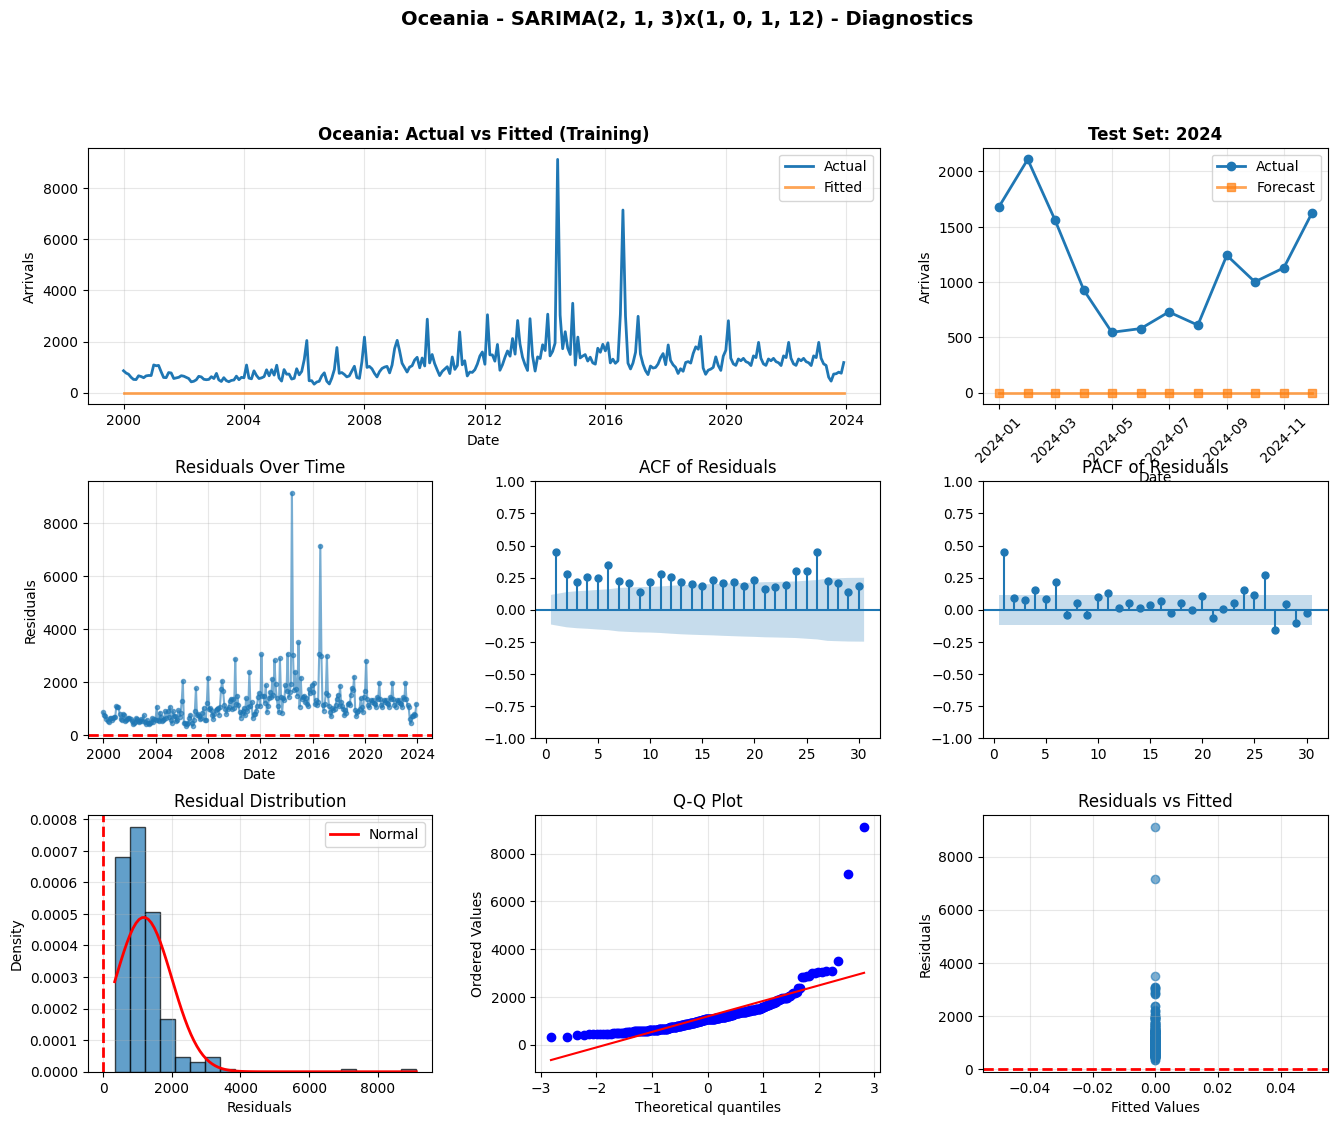


✓ SARIMA model completed for Oceania

TARGET: TOTAL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 89905.16

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 6503.79
  Tested 40/144 models... Best AICc: 6473.71
  Tested 60/144 models... Best AICc: 6473.71
  Tested 80/144 models... Best AICc: 6473.71
  Tested 100/144 models... Best AICc: 6473.71
  Tested 120/144 models... Best AICc: 6473.71
  Tested 140/144 models... Best AICc: 6471.03

✓ Best Model Found: SARIMA(3, 1, 3) x (1, 0, 1, 12)
✓ AICc: 6471.03

--- Test Set Predictions ---
MAE: 25119.93
RMSE: 30702.86
MAPE: 17.41%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 660.2455
Residual Std: 18158.18

T-Test for Zero Mean:
  t-statistic: 0.6171
  p-value: 0.5377
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCEL

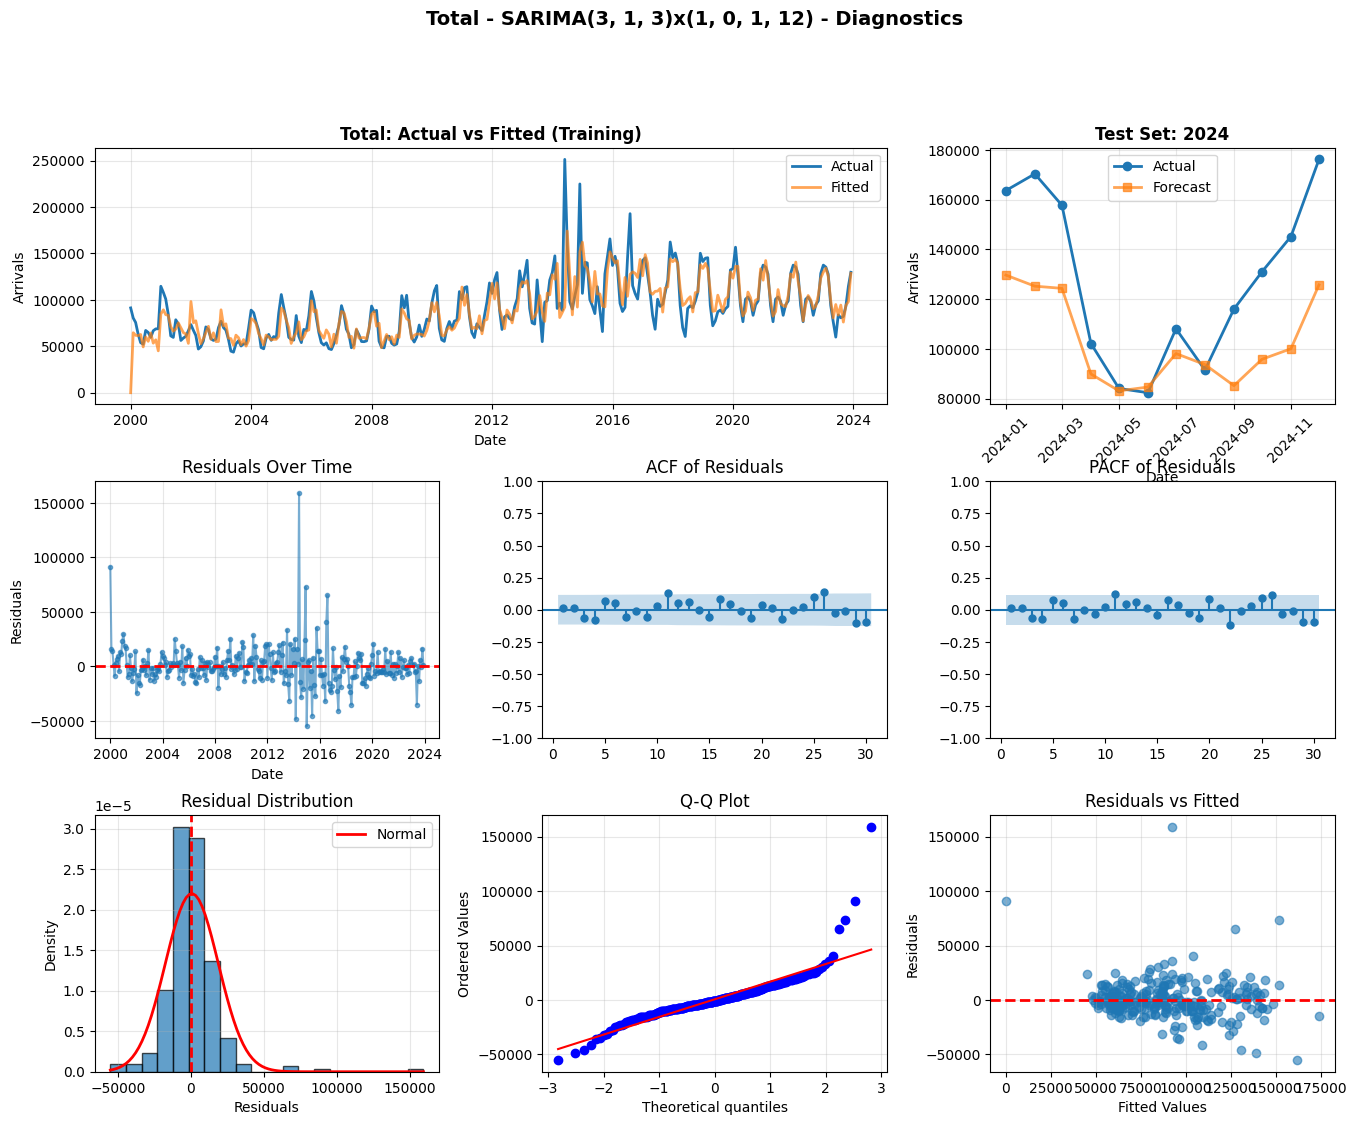


✓ SARIMA model completed for TOTAL

SUMMARY OF SARIMA RESULTS

               Continent                         Model  p  d  q  P  D  Q  s         AIC        AICc         BIC          MAE         RMSE   MAPE (%) Mean_Test LB_Test JB_Test ARCH_Test Overall_Diagnostic  Train_Obs  Test_Obs
                  Africa SARIMA(2, 1, 3)x(2, 0, 0, 12)  2  1  3  2  0  0 12 4358.246867 4358.764853 4387.522725   178.895225   198.417672  58.563756 Excellent    Pass    Fail      Pass          Some Fail        288        12
America_Central_E_Caribe SARIMA(3, 1, 3)x(1, 0, 1, 12)  3  1  3  1  0  1 12 4220.503846 4221.153666 4253.439186   369.435966   486.812717  22.907091 Excellent    Pass    Fail      Pass          Some Fail        288        12
        America_Do_Norte SARIMA(3, 1, 3)x(1, 0, 2, 12)  3  1  3  1  0  2 12 5684.866406 5685.663507 5721.461228  4625.896945  6062.527454  21.920874 Excellent    Pass    Fail      Pass          Some Fail        288        12
          America_Do_Sul SARIMA(2, 1

In [5]:
## Auto ARIMA (SARIMA without COVID Dummy) - By Continent
## Using statsmodels directly (no pmdarima needed)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(f"=== Auto ARIMA (SARIMA) - No Exogenous Variables ===")
print(f"Train period: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Test period: {test_df['date'].min()} to {test_df['date'].max()}")
print("\n" + "="*80 + "\n")

# Get unique continents
continents = sorted(train_df['continent'].unique())

# Store results
arima_results = []

# Define parameter ranges for grid search
p_range = range(0, 4)
d_range = [1]
q_range = range(0, 4)
P_range = range(0, 3)
D_range = [0]
Q_range = range(0, 3)
s = 12

for continent in continents:
    print(f"\n{'='*80}")
    print(f"TARGET: {continent.upper()}")
    print(f"{'='*80}\n")
    
    # Filter data for this continent
    train_continent = train_df[train_df['continent'] == continent].copy()
    test_continent = test_df[test_df['continent'] == continent].copy()
    
    # Sort and set index
    train_continent = train_continent.sort_values('date').set_index('date')
    test_continent = test_continent.sort_values('date').set_index('date')
    
    # Prepare data (NO exogenous variables)
    y_train = train_continent['actual']
    y_test = test_continent['actual']
    
    print(f"Training observations: {len(y_train)} ({y_train.index.min()} to {y_train.index.max()})")
    print(f"Test observations: {len(y_test)} ({y_test.index.min()} to {y_test.index.max()})")
    print(f"Mean arrivals (train): {y_train.mean():.2f}")
    
    print(f"\n--- Running Grid Search for Best SARIMA Model ---")
    print("This may take a few minutes...")
    
    best_aicc = np.inf
    best_model = None
    best_order = None
    best_seasonal_order = None
    
    # Grid search
    total_models = len(list(product(p_range, d_range, q_range, P_range, D_range, Q_range)))
    model_count = 0
    
    try:
        for p in p_range:
            for d in d_range:
                for q in q_range:
                    for P in P_range:
                        for D in D_range:
                            for Q in Q_range:
                                model_count += 1
                                try:
                                    # ✓ NO exog parameter
                                    model = SARIMAX(
                                        y_train,
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, s),
                                        enforce_stationarity=True,
                                        enforce_invertibility=True
                                    )
                                    
                                    fitted_model = model.fit(disp=False, maxiter=200)
                                    aicc = fitted_model.aicc
                                    
                                    if aicc < best_aicc:
                                        best_aicc = aicc
                                        best_model = fitted_model
                                        best_order = (p, d, q)
                                        best_seasonal_order = (P, D, Q, s)
                                        
                                    if model_count % 20 == 0:
                                        print(f"  Tested {model_count}/{total_models} models... Best AICc: {best_aicc:.2f}")
                                        
                                except:
                                    continue
        
        print(f"\n✓ Best Model Found: SARIMA{best_order} x {best_seasonal_order}")
        print(f"✓ AICc: {best_aicc:.2f}")
        
        # Extract model parameters
        p, d, q = best_order
        P, D, Q, s_param = best_seasonal_order
        aic = best_model.aic
        aicc = best_model.aicc
        bic = best_model.bic
        
        # Make predictions on test set (NO exog)
        print(f"\n--- Test Set Predictions ---")
        forecast = best_model.forecast(steps=len(y_test))

        forecast_df = pd.DataFrame({
            'date': y_test.index,
            'continent': continent,
            'actual': y_test.values,
            'forecast': forecast.values,
            'error': y_test.values - forecast.values
        })

        if 'all_forecasts2' not in locals():
            all_forecasts2 = []
        all_forecasts2.append(forecast_df)

        fitted_values = best_model.fittedvalues

        train_forecast_df = pd.DataFrame({
            'date': y_train.index,
            'continent': continent,
            'actual': y_train.values,
            'forecast': fitted_values.values,
            'error': y_train.values - fitted_values.values,
            'abs_error': np.abs(y_train.values - fitted_values.values),
            'pct_error': ((y_train.values - fitted_values.values) / y_train.values) * 100
        })

        if 'all_train_forecasts2' not in locals():
            all_train_forecasts2 = []
        all_train_forecasts2.append(train_forecast_df)
        
        # Calculate metrics
        from sklearn.metrics import mean_absolute_error, mean_squared_error
        
        mae = mean_absolute_error(y_test, forecast)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mape = np.mean(np.abs((y_test - forecast) / y_test)) * 100
        
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape:.2f}%")
        
        # Residual diagnostics
        print(f"\n--- Residual Diagnostics (Training Set) ---")
        residuals = best_model.resid
        print(f"Residual Mean: {residuals.mean():.4f}")
        print(f"Residual Std: {residuals.std():.2f}")

        # T-Test for Zero Mean
        print(f"\nT-Test for Zero Mean:")
        from scipy.stats import ttest_1samp
        t_stat, t_pvalue = ttest_1samp(residuals, 0)
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {t_pvalue:.4f}")
        
        threshold_5pct = 0.05 * residuals.std()
        threshold_10pct = 0.10 * residuals.std()
        mean_abs = abs(residuals.mean())
        
        if t_pvalue > 0.05:
            print(f"  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)")
            if mean_abs < threshold_5pct:
                print(f"  ✓✓ EXCELENTE: |Mean| < 5% do Std ({threshold_5pct:.2f})")
                mean_result = "Excellent"
            elif mean_abs < threshold_10pct:
                print(f"  ✓ BOM: |Mean| < 10% do Std ({threshold_10pct:.2f})")
                mean_result = "Good"
            else:
                print(f"  ⚠️ ACEITÁVEL: |Mean| > 10% do Std, mas estatisticamente = 0")
                mean_result = "Acceptable"
        else:
            print(f"  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)")
            if residuals.mean() > 0:
                print(f"  → Modelo SUBESTIMA sistematicamente os valores reais")
            else:
                print(f"  → Modelo SUPERESTIMA sistematicamente os valores reais")
            mean_result = "Biased"
        
        # Ljung-Box Test
        lb_test = acorr_ljungbox(residuals, lags=24, return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].iloc[-1]
        print(f"\nLjung-Box Test (lag 24):")
        print(f"  p-value: {lb_pvalue:.4f}")
        if lb_pvalue > 0.05:
            print(f"  ✓ PASS: No significant autocorrelation (p > 0.05)")
            lb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Significant autocorrelation detected (p < 0.05)")
            lb_result = "Fail"
        
        # Jarque-Bera Test
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)
        print(f"\nJarque-Bera Test (Normality):")
        print(f"  Statistic: {jb_stat:.4f}")
        print(f"  p-value: {jb_pvalue:.4f}")
        if jb_pvalue > 0.05:
            print(f"  ✓ PASS: Residuals are normally distributed (p > 0.05)")
            jb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Residuals are not normally distributed (p < 0.05)")
            jb_result = "Fail"
        
        # ARCH Test
        from statsmodels.stats.diagnostic import het_arch
        try:
            arch_test = het_arch(residuals, nlags=10)
            arch_pvalue = arch_test[1]
            print(f"\nARCH Test (Heteroskedasticity):")
            print(f"  p-value: {arch_pvalue:.4f}")
            if arch_pvalue > 0.05:
                print(f"  ✓ PASS: No heteroskedasticity (p > 0.05)")
                arch_result = "Pass"
            else:
                print(f"  ✗ FAIL: Heteroskedasticity detected (p < 0.05)")
                arch_result = "Fail"
        except:
            arch_result = "Error"
            print(f"\nARCH Test: Could not be performed")
        
        # Overall diagnostic result
        print(f"\n--- Overall Residual Diagnostics ---")
        all_pass = all([lb_result == "Pass", jb_result == "Pass", arch_result == "Pass"])
        if all_pass:
            print("✓✓✓ ALL TESTS PASSED - Model residuals are well-behaved")
            diagnostic_result = "All Pass"
        else:
            print("⚠️ SOME TESTS FAILED - Review residual diagnostics")
            diagnostic_result = "Some Fail"
        
        # Plot diagnostics
        fig = plt.figure(figsize=(16, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
        
        # Plot 1: Fitted vs Actual (Training)
        ax1 = fig.add_subplot(gs[0, :2])
        fitted = best_model.fittedvalues
        ax1.plot(y_train.index, y_train.values, label='Actual', linewidth=2)
        ax1.plot(y_train.index, fitted, label='Fitted', linewidth=2, alpha=0.7)
        ax1.set_title(f'{continent.title()}: Actual vs Fitted (Training)', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Arrivals')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Forecast vs Actual (Test)
        ax2 = fig.add_subplot(gs[0, 2])
        ax2.plot(y_test.index, y_test.values, label='Actual', linewidth=2, marker='o')
        ax2.plot(y_test.index, forecast, label='Forecast', linewidth=2, alpha=0.7, marker='s')
        ax2.set_title(f'Test Set: 2024', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Arrivals')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        # Plot 3: Residuals over time
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.plot(residuals.index, residuals, marker='o', markersize=3, alpha=0.6)
        ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax3.set_title('Residuals Over Time')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Residuals')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: ACF of Residuals
        ax4 = fig.add_subplot(gs[1, 1])
        plot_acf(residuals, lags=30, ax=ax4, zero=False)
        ax4.set_title('ACF of Residuals')
        
        # Plot 5: PACF of Residuals
        ax5 = fig.add_subplot(gs[1, 2])
        plot_pacf(residuals, lags=30, ax=ax5, zero=False)
        ax5.set_title('PACF of Residuals')
        
        # Plot 6: Histogram of Residuals
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.hist(residuals, bins=20, alpha=0.7, edgecolor='black', density=True)
        ax6.axvline(x=0, color='r', linestyle='--', linewidth=2)
        # Add normal distribution overlay
        mu, sigma = residuals.mean(), residuals.std()
        x = np.linspace(residuals.min(), residuals.max(), 100)
        ax6.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
        ax6.set_title('Residual Distribution')
        ax6.set_xlabel('Residuals')
        ax6.set_ylabel('Density')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        
        # Plot 7: Q-Q Plot
        ax7 = fig.add_subplot(gs[2, 1])
        stats.probplot(residuals, dist="norm", plot=ax7)
        ax7.set_title('Q-Q Plot')
        ax7.grid(True, alpha=0.3)
        
        # Plot 8: Residuals vs Fitted
        ax8 = fig.add_subplot(gs[2, 2])
        ax8.scatter(fitted, residuals, alpha=0.6)
        ax8.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax8.set_xlabel('Fitted Values')
        ax8.set_ylabel('Residuals')
        ax8.set_title('Residuals vs Fitted')
        ax8.grid(True, alpha=0.3)
        
        plt.suptitle(f'{continent.title()} - SARIMA{best_order}x{best_seasonal_order} - Diagnostics', 
                     fontsize=14, fontweight='bold', y=0.995)
        plt.show()
        
        # Store results
        arima_results.append({
            'Continent': continent,
            'Model': f'SARIMA{best_order}x{best_seasonal_order}',
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q, 's': s_param,
            'AIC': aic,
            'AICc': aicc,
            'BIC': bic,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'Mean_Test': mean_result,
            'LB_Test': lb_result,
            'JB_Test': jb_result,
            'ARCH_Test': arch_result,
            'Overall_Diagnostic': diagnostic_result,
            'Train_Obs': len(y_train),
            'Test_Obs': len(y_test)
        })
        
        print(f"\n✓ SARIMA model completed for {continent}")
        
    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()
        arima_results.append({
            'Continent': continent,
            'Model': 'Error',
            'p': np.nan, 'd': np.nan, 'q': np.nan,
            'P': np.nan, 'D': np.nan, 'Q': np.nan, 's': np.nan,
            'AIC': np.nan,
            'AICc': np.nan,
            'BIC': np.nan,
            'MAE': np.nan,
            'RMSE': np.nan,
            'MAPE (%)': np.nan,
            'Mean_Test': 'Error',
            'LB_Test': 'Error',
            'JB_Test': 'Error',
            'ARCH_Test': 'Error',
            'Overall_Diagnostic': 'Error',
            'Train_Obs': np.nan,
            'Test_Obs': np.nan
        })
        continue

# Summary
print("\n" + "="*80)
print("SUMMARY OF SARIMA RESULTS")
print("="*80 + "\n")

results_df = pd.DataFrame(arima_results)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("PERFORMANCE METRICS RANKING")
print("="*80 + "\n")

print("Best models by RMSE (lower is better):")
print(results_df.sort_values('RMSE')[['Continent', 'Model', 'RMSE', 'MAE', 'MAPE (%)']].to_string(index=False))

print("\n" + "="*80)
print("✓ SARIMA modeling completed for all continents")
print("="*80)

print("\n" + "="*80)
print("Notes:")
print("- SARIMA(p,d,q)x(P,D,Q,s) where s=12 (monthly seasonality)")
print("- AICc: Corrected AIC (better for small samples)")
print("- MAE: Mean Absolute Error")
print("- RMSE: Root Mean Squared Error")
print("- MAPE: Mean Absolute Percentage Error")
print("- LB_Test: Ljung-Box (autocorrelation) - Pass means no autocorrelation")
print("- JB_Test: Jarque-Bera (normality) - Pass means residuals are normal")
print("- ARCH_Test: Heteroskedasticity - Pass means constant variance")
print("- Lower RMSE/MAE/MAPE = Better predictions")
print("- Lower AICc/BIC = Better model fit")
print("="*80)

if 'all_forecasts2' in locals() and len(all_forecasts2) > 0:
    forecasts_final = pd.concat(all_forecasts2, ignore_index=True)
    output_path = PROJECT_ROOT / "notebooks" / "modeling" / "10_sarima_forecasts_TEST.csv"
    forecasts_final.to_csv(output_path, index=False)
    print(f"\n✓ Test forecasts saved: {output_path}")

if 'all_train_forecasts2' in locals() and len(all_train_forecasts2) > 0:
    train_forecasts_final = pd.concat(all_train_forecasts2, ignore_index=True)
    output_path_train = PROJECT_ROOT / "notebooks" / "modeling" / "10_sarima_forecasts_TRAIN.csv"
    train_forecasts_final.to_csv(output_path_train, index=False)
    print(f"✓ Train fitted values saved: {output_path_train}")

In [7]:
if 'all_forecasts2' in locals() and len(all_forecasts2) > 0:
    forecasts_final = pd.concat(all_forecasts2, ignore_index=True)
    output_path = PROJECT_ROOT / "notebooks" / "modeling" / "10_sarima_forecasts_TEST.csv"
    forecasts_final.to_csv(output_path, index=False)
    print(f"\n✓ Test forecasts saved: {output_path}")

if 'all_train_forecasts2' in locals() and len(all_train_forecasts2) > 0:
    train_forecasts_final = pd.concat(all_train_forecasts2, ignore_index=True)
    output_path_train = PROJECT_ROOT / "notebooks" / "modeling" / "10_sarima_forecasts_TRAIN.csv"
    train_forecasts_final.to_csv(output_path_train, index=False)
    print(f"✓ Train fitted values saved: {output_path_train}")


✓ Test forecasts saved: C:\Users\f0oo\OneDrive - PETROBRAS\Documentos\international_arrivals_time_series_forecasting\notebooks\modeling\10_sarima_forecasts_TEST.csv
✓ Train fitted values saved: C:\Users\f0oo\OneDrive - PETROBRAS\Documentos\international_arrivals_time_series_forecasting\notebooks\modeling\10_sarima_forecasts_TRAIN.csv


=== Auto ARIMA (SARIMA) - No Exogenous Variables ===
Train period: 2000-01-01 00:00:00 to 2023-12-01 00:00:00
Test period: 2024-01-01 00:00:00 to 2024-12-01 00:00:00



TARGET: AFRICA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1460.01

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4483.98
  Tested 40/144 models... Best AICc: 4435.64
  Tested 60/144 models... Best AICc: 4376.29
  Tested 80/144 models... Best AICc: 4376.29
  Tested 100/144 models... Best AICc: 4375.86
  Tested 120/144 models... Best AICc: 4375.86
  Tested 140/144 models... Best AICc: 4375.86

✓ Best Model Found: SARIMA(2, 0, 1) x (1, 0, 1, 12)
✓ AICc: 4375.86

--- Test Set Predictions ---
MAE: 146.87
RMSE: 184.40
MAPE: 45.51%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 8.2014
Residual Std: 478.62

T-Test for Zero Mea

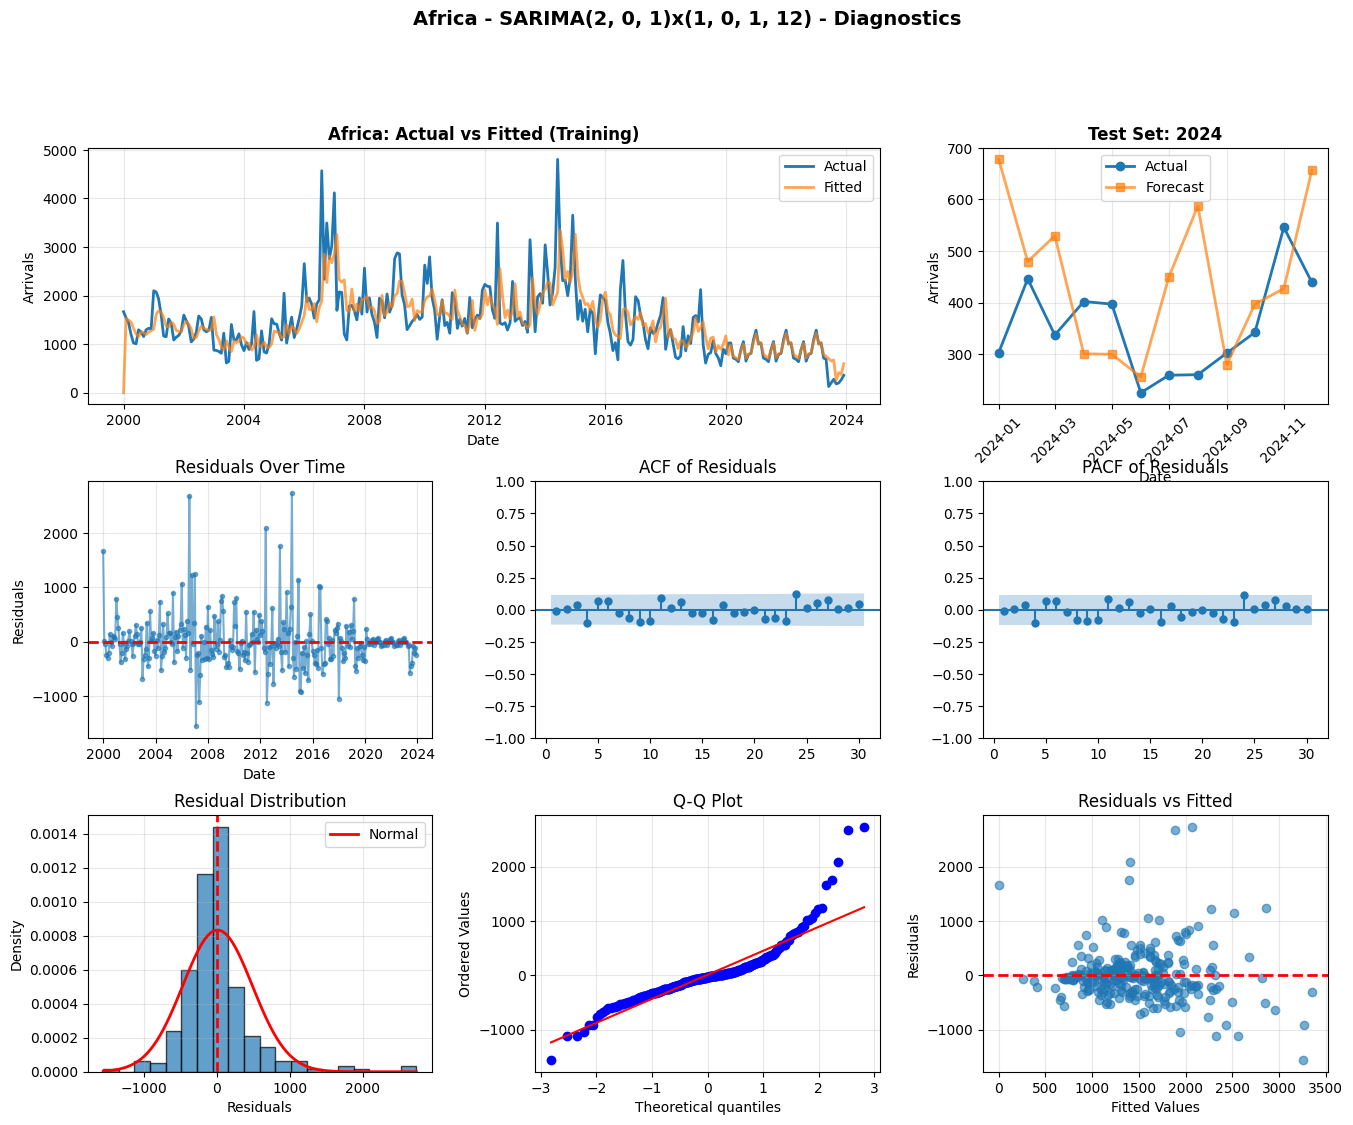


✓ SARIMA model completed for Africa

TARGET: AMERICA_CENTRAL_E_CARIBE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 790.84

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4303.91
  Tested 40/144 models... Best AICc: 4293.46
  Tested 60/144 models... Best AICc: 4246.63
  Tested 80/144 models... Best AICc: 4246.63
  Tested 100/144 models... Best AICc: 4246.63
  Tested 120/144 models... Best AICc: 4246.63
  Tested 140/144 models... Best AICc: 653.04

✓ Best Model Found: SARIMA(3, 0, 2) x (1, 0, 2, 12)
✓ AICc: 653.04

--- Test Set Predictions ---
MAE: 49112.15
RMSE: 49113.49
MAPE: 3860.85%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 46381.5655
Residual Std: 9263.42

T-Test for Zero Mean:
  t-statistic: 84.9709
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.

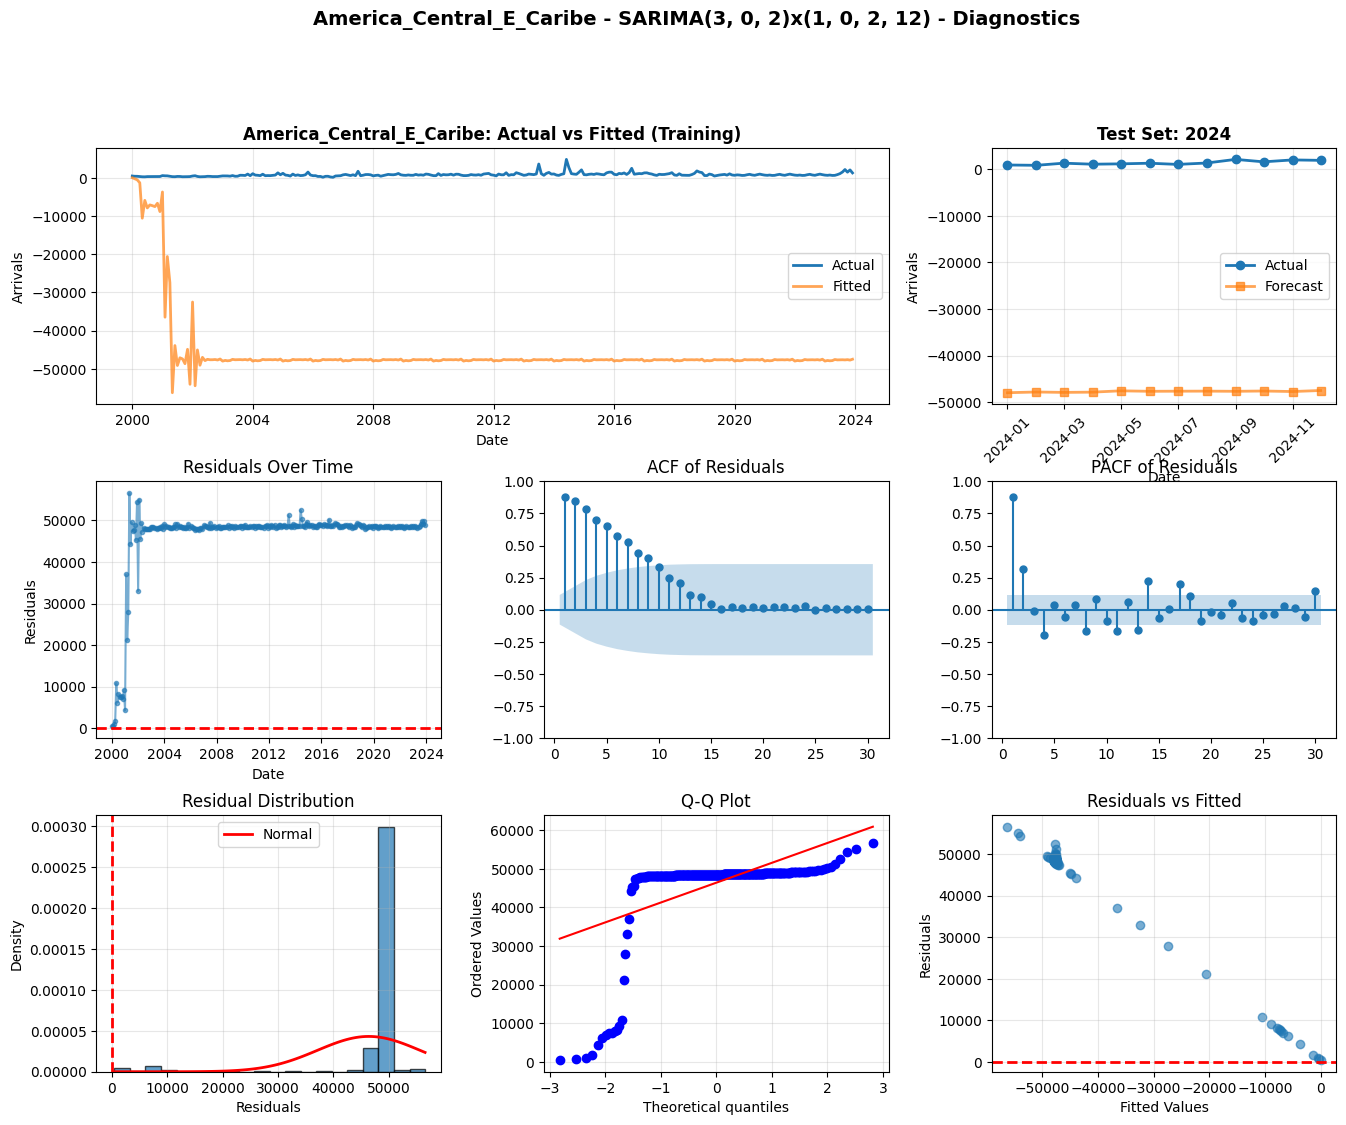


✓ SARIMA model completed for America_Central_E_Caribe

TARGET: AMERICA_DO_NORTE

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 15675.83

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5762.47
  Tested 40/144 models... Best AICc: 14.40
  Tested 60/144 models... Best AICc: 14.40
  Tested 80/144 models... Best AICc: 14.40
  Tested 100/144 models... Best AICc: 14.40
  Tested 120/144 models... Best AICc: 14.40
  Tested 140/144 models... Best AICc: 14.40

✓ Best Model Found: SARIMA(0, 0, 2) x (2, 0, 2, 12)
✓ AICc: 14.40

--- Test Set Predictions ---
MAE: 18354.58
RMSE: 19069.59
MAPE: 100.00%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 15675.8323
Residual Std: 5793.35

T-Test for Zero Mean:
  t-statistic: 45.9195
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.0

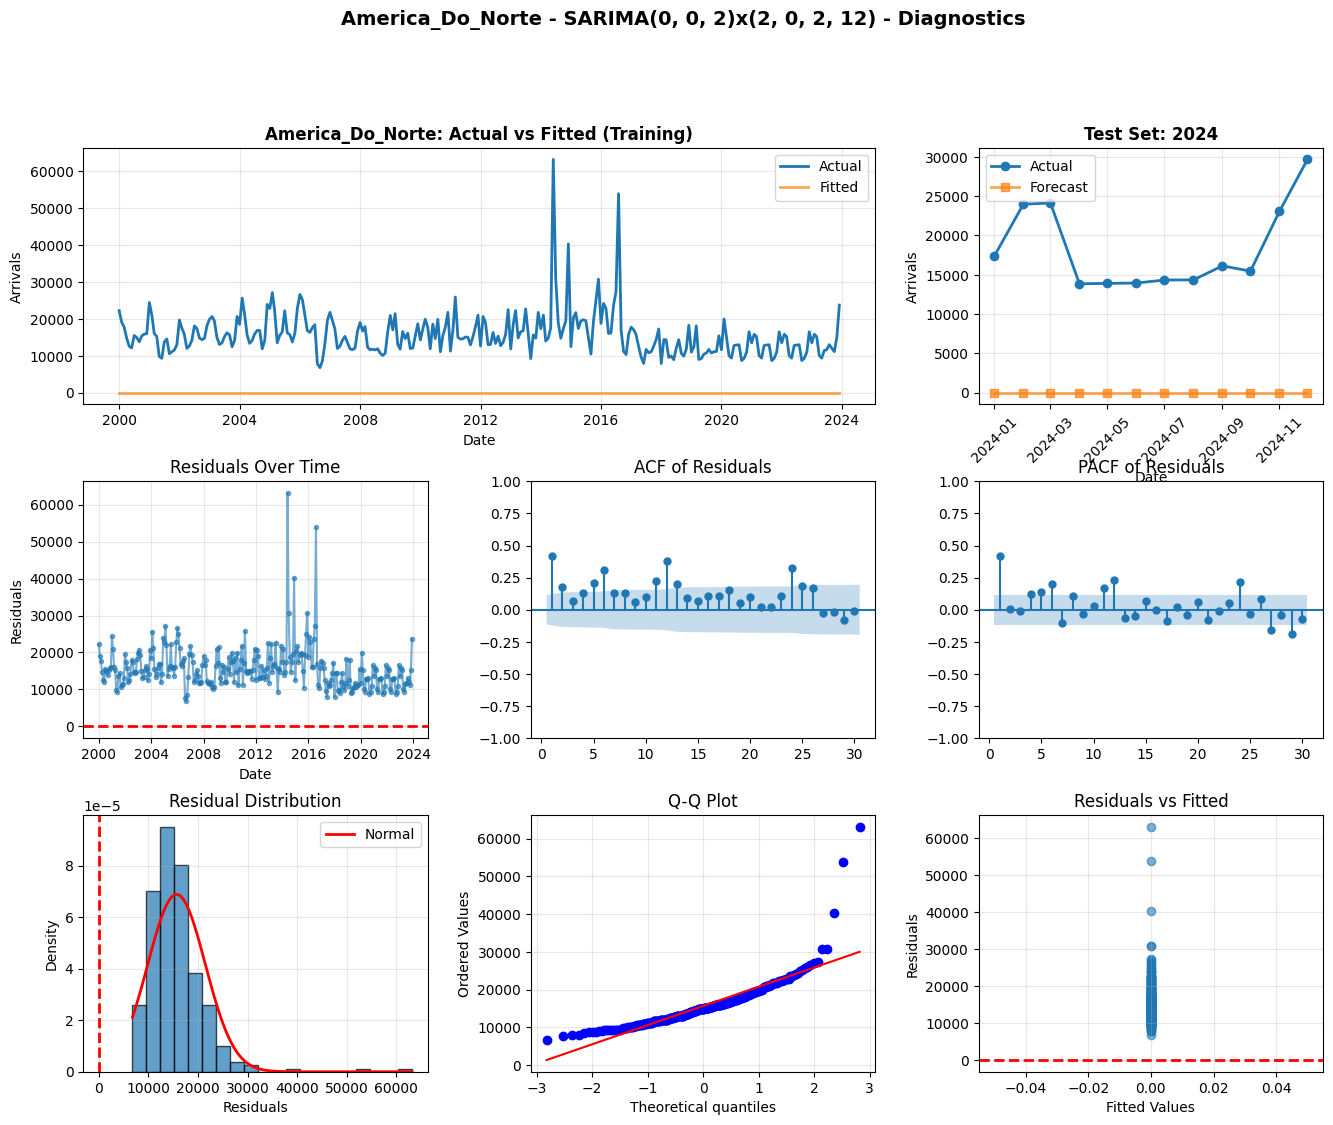


✓ SARIMA model completed for America_Do_Norte

TARGET: AMERICA_DO_SUL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33751.28

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 5971.11
  Tested 40/144 models... Best AICc: 5930.05
  Tested 60/144 models... Best AICc: 14.40
  Tested 80/144 models... Best AICc: 14.40
  Tested 100/144 models... Best AICc: 14.40
  Tested 120/144 models... Best AICc: 14.40
  Tested 140/144 models... Best AICc: 14.40

✓ Best Model Found: SARIMA(1, 0, 1) x (2, 0, 2, 12)
✓ AICc: 14.40

--- Test Set Predictions ---
MAE: 74070.92
RMSE: 77134.67
MAPE: 100.00%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 33751.2830
Residual Std: 20648.02

T-Test for Zero Mean:
  t-statistic: 27.7401
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)
  → 

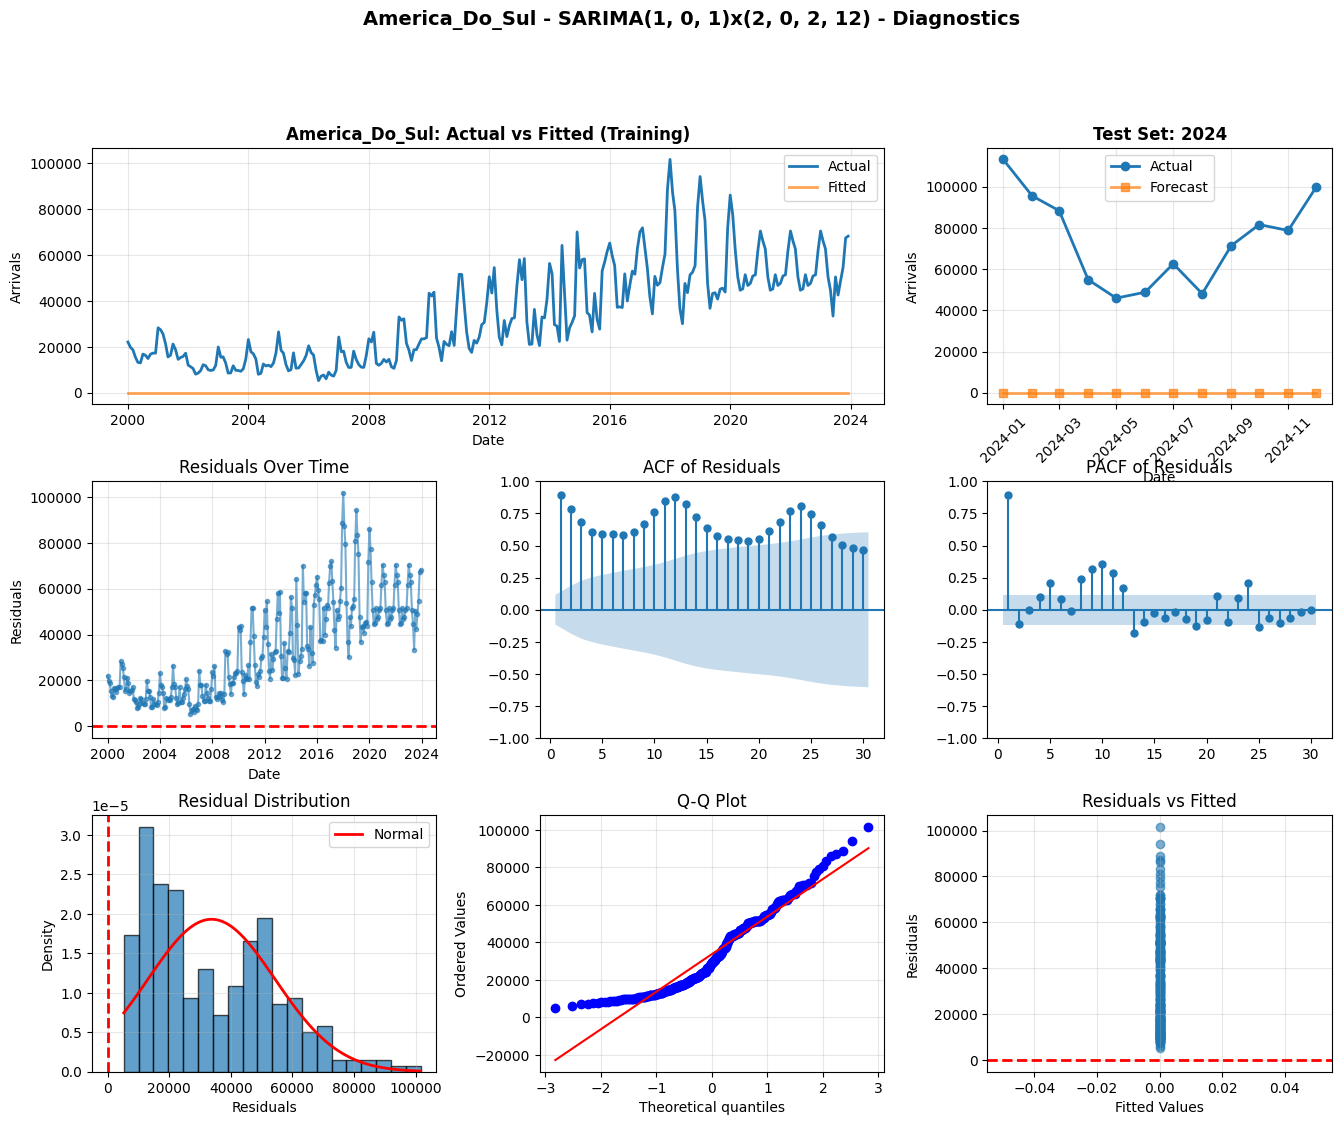


✓ SARIMA model completed for America_Do_Sul

TARGET: ASIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 3174.91

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 10.21
  Tested 40/144 models... Best AICc: 10.21
  Tested 60/144 models... Best AICc: 10.21
  Tested 80/144 models... Best AICc: 10.21
  Tested 100/144 models... Best AICc: 10.21
  Tested 120/144 models... Best AICc: 10.21
  Tested 140/144 models... Best AICc: 10.21

✓ Best Model Found: SARIMA(0, 0, 1) x (2, 0, 1, 12)
✓ AICc: 10.21

--- Test Set Predictions ---
MAE: 2741.75
RMSE: 2906.50
MAPE: 100.00%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 3174.9076
Residual Std: 1910.37

T-Test for Zero Mean:
  t-statistic: 28.2039
  p-value: 0.0000
  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)
  → Modelo SUBESTIMA sist

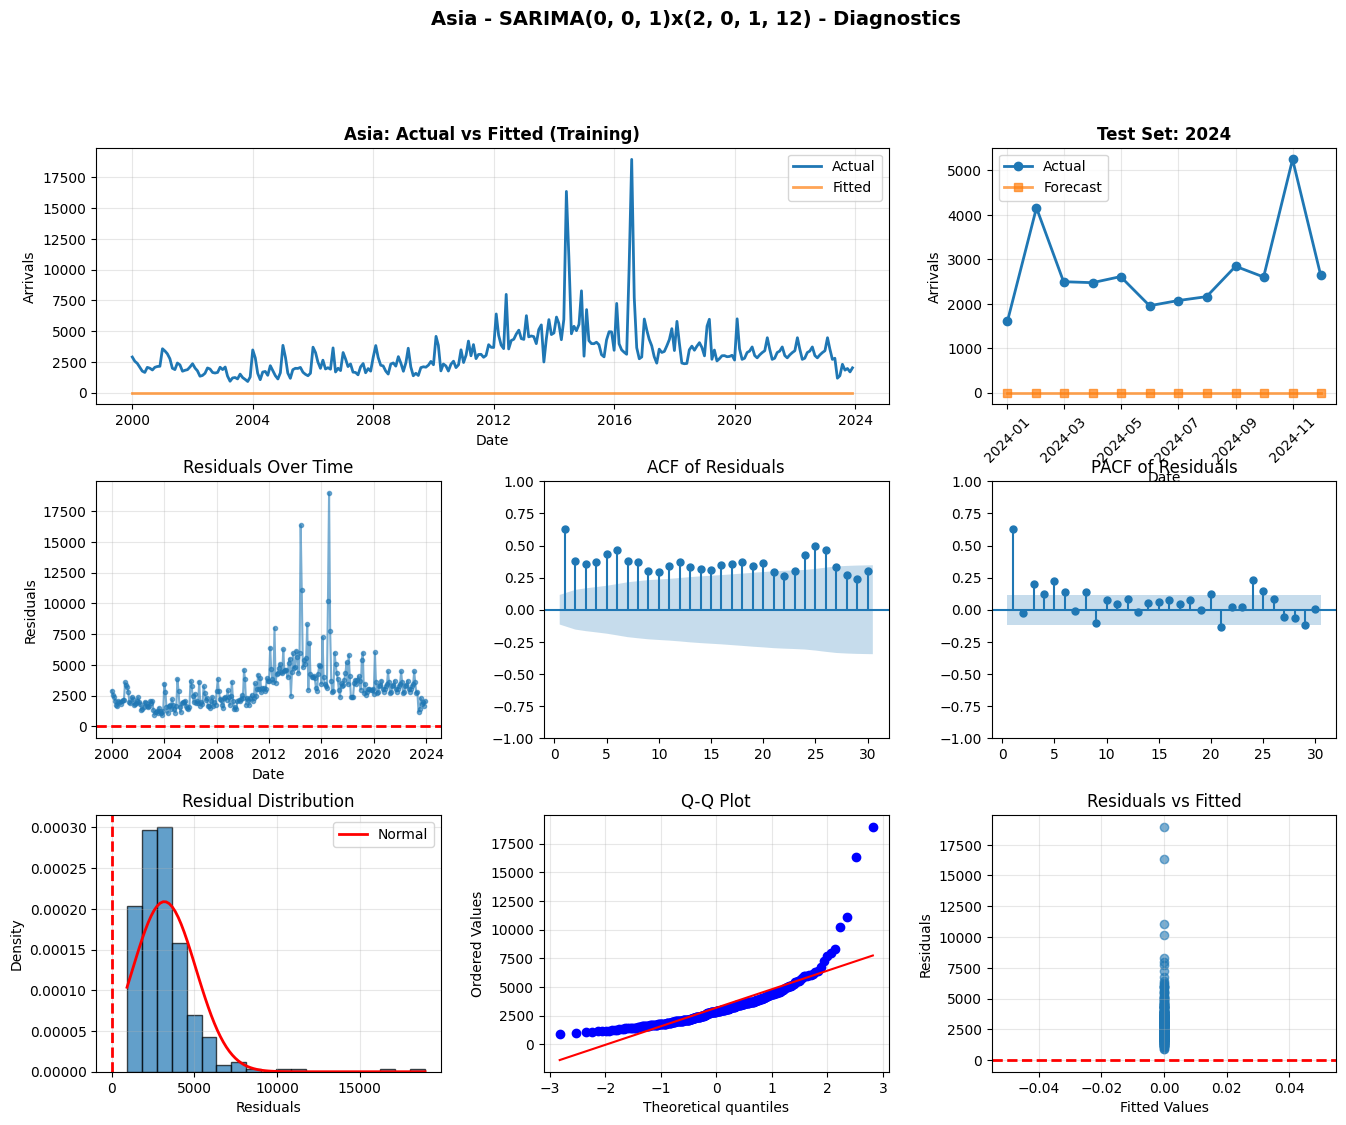


✓ SARIMA model completed for Asia

TARGET: EUROPA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 33473.39

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 6048.14
  Tested 40/144 models... Best AICc: 6009.51
  Tested 60/144 models... Best AICc: 5952.53
  Tested 80/144 models... Best AICc: 5952.53
  Tested 100/144 models... Best AICc: 5952.30
  Tested 120/144 models... Best AICc: 5949.97
  Tested 140/144 models... Best AICc: 5949.97

✓ Best Model Found: SARIMA(2, 0, 3) x (1, 0, 1, 12)
✓ AICc: 5949.97

--- Test Set Predictions ---
MAE: 4727.61
RMSE: 5579.96
MAPE: 14.96%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 260.0898
Residual Std: 7481.82

T-Test for Zero Mean:
  t-statistic: 0.5899
  p-value: 0.5557
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCELENTE:

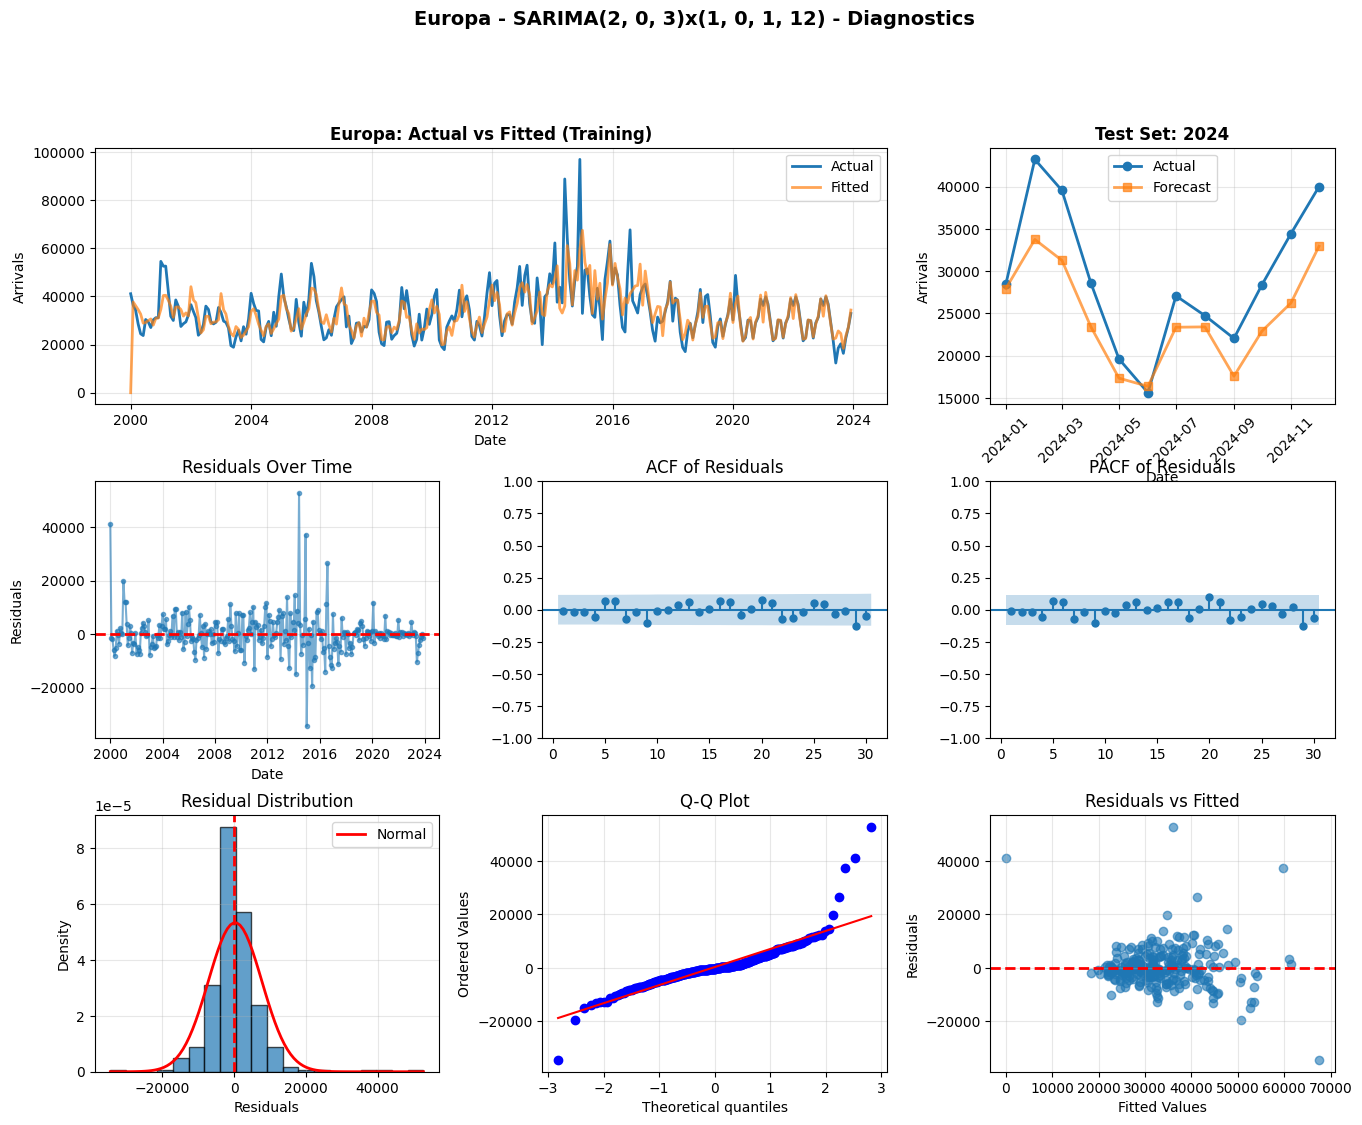


✓ SARIMA model completed for Europa

TARGET: OCEANIA

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 1182.38

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 4644.55
  Tested 40/144 models... Best AICc: 4639.09
  Tested 60/144 models... Best AICc: 4592.14
  Tested 80/144 models... Best AICc: 4592.14
  Tested 100/144 models... Best AICc: 4592.14
  Tested 120/144 models... Best AICc: 4591.51
  Tested 140/144 models... Best AICc: 4580.64

✓ Best Model Found: SARIMA(3, 0, 3) x (1, 0, 1, 12)
✓ AICc: 4580.64

--- Test Set Predictions ---
MAE: 345.93
RMSE: 383.39
MAPE: 35.63%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 31.5218
Residual Std: 655.98

T-Test for Zero Mean:
  t-statistic: 0.8155
  p-value: 0.4155
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCELENTE: |

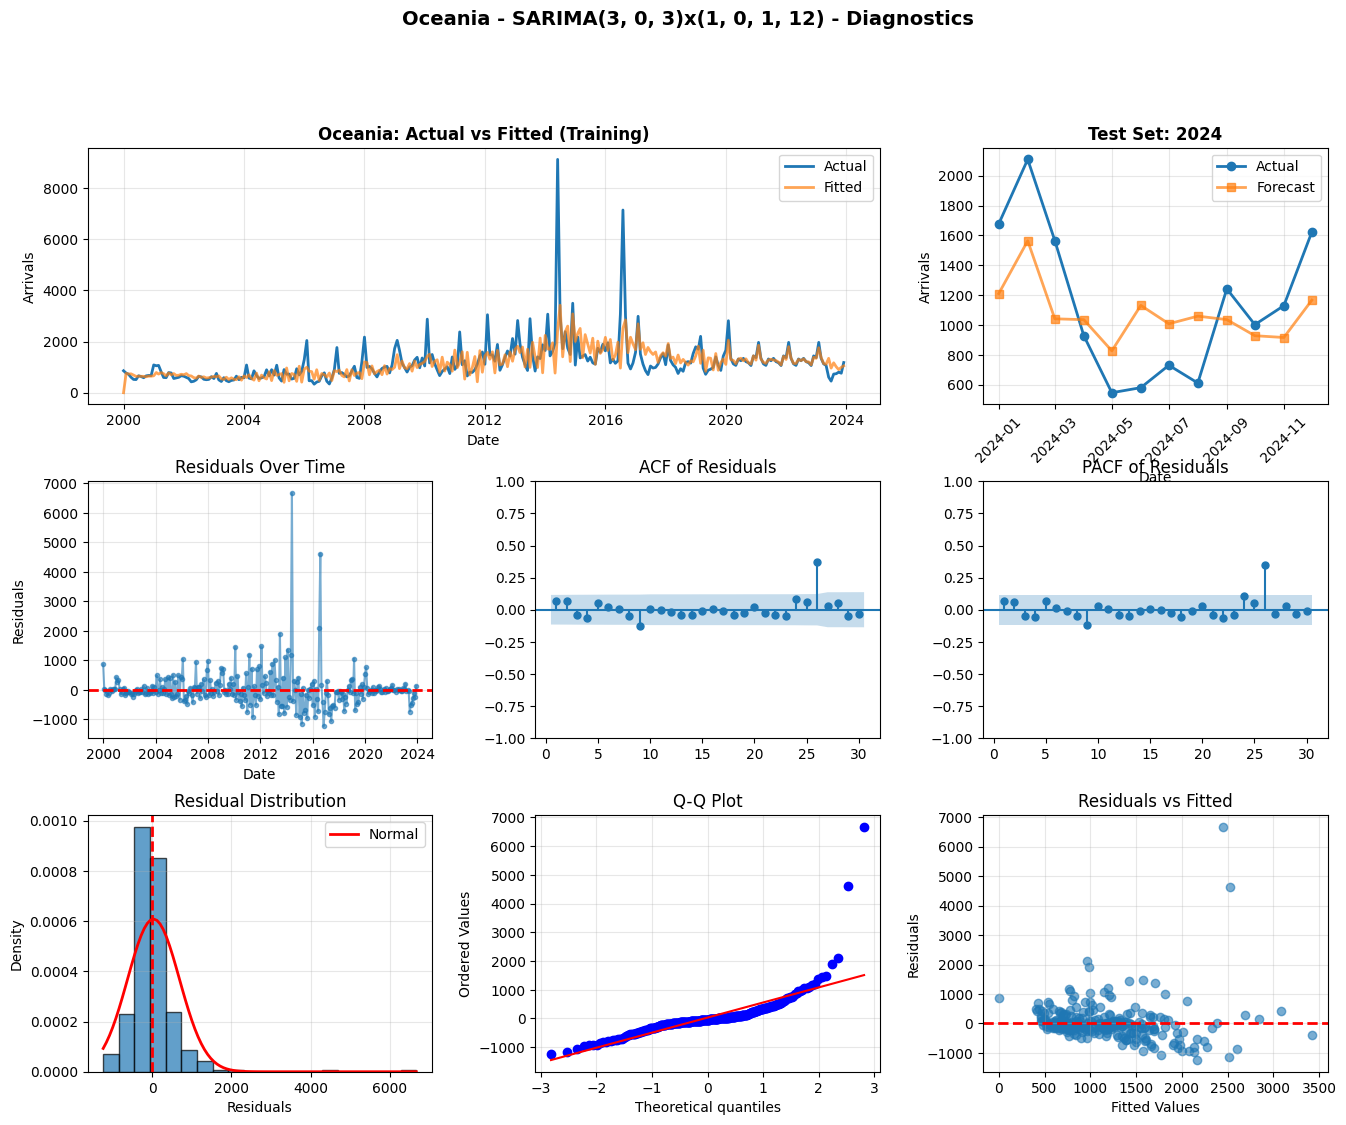


✓ SARIMA model completed for Oceania

TARGET: TOTAL

Training observations: 288 (2000-01-01 00:00:00 to 2023-12-01 00:00:00)
Test observations: 12 (2024-01-01 00:00:00 to 2024-12-01 00:00:00)
Mean arrivals (train): 89905.16

--- Running Grid Search for Best SARIMA Model ---
This may take a few minutes...
  Tested 20/144 models... Best AICc: 6588.17
  Tested 40/144 models... Best AICc: 6588.17
  Tested 60/144 models... Best AICc: 6492.76
  Tested 80/144 models... Best AICc: 6492.76
  Tested 100/144 models... Best AICc: 6492.76
  Tested 120/144 models... Best AICc: 6492.76
  Tested 140/144 models... Best AICc: 6492.76

✓ Best Model Found: SARIMA(1, 0, 1) x (1, 0, 1, 12)
✓ AICc: 6492.76

--- Test Set Predictions ---
MAE: 26028.44
RMSE: 30923.41
MAPE: 18.46%

--- Residual Diagnostics (Training Set) ---
Residual Mean: 369.6959
Residual Std: 18910.53

T-Test for Zero Mean:
  t-statistic: 0.3318
  p-value: 0.7403
  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)
  ✓✓ EXCEL

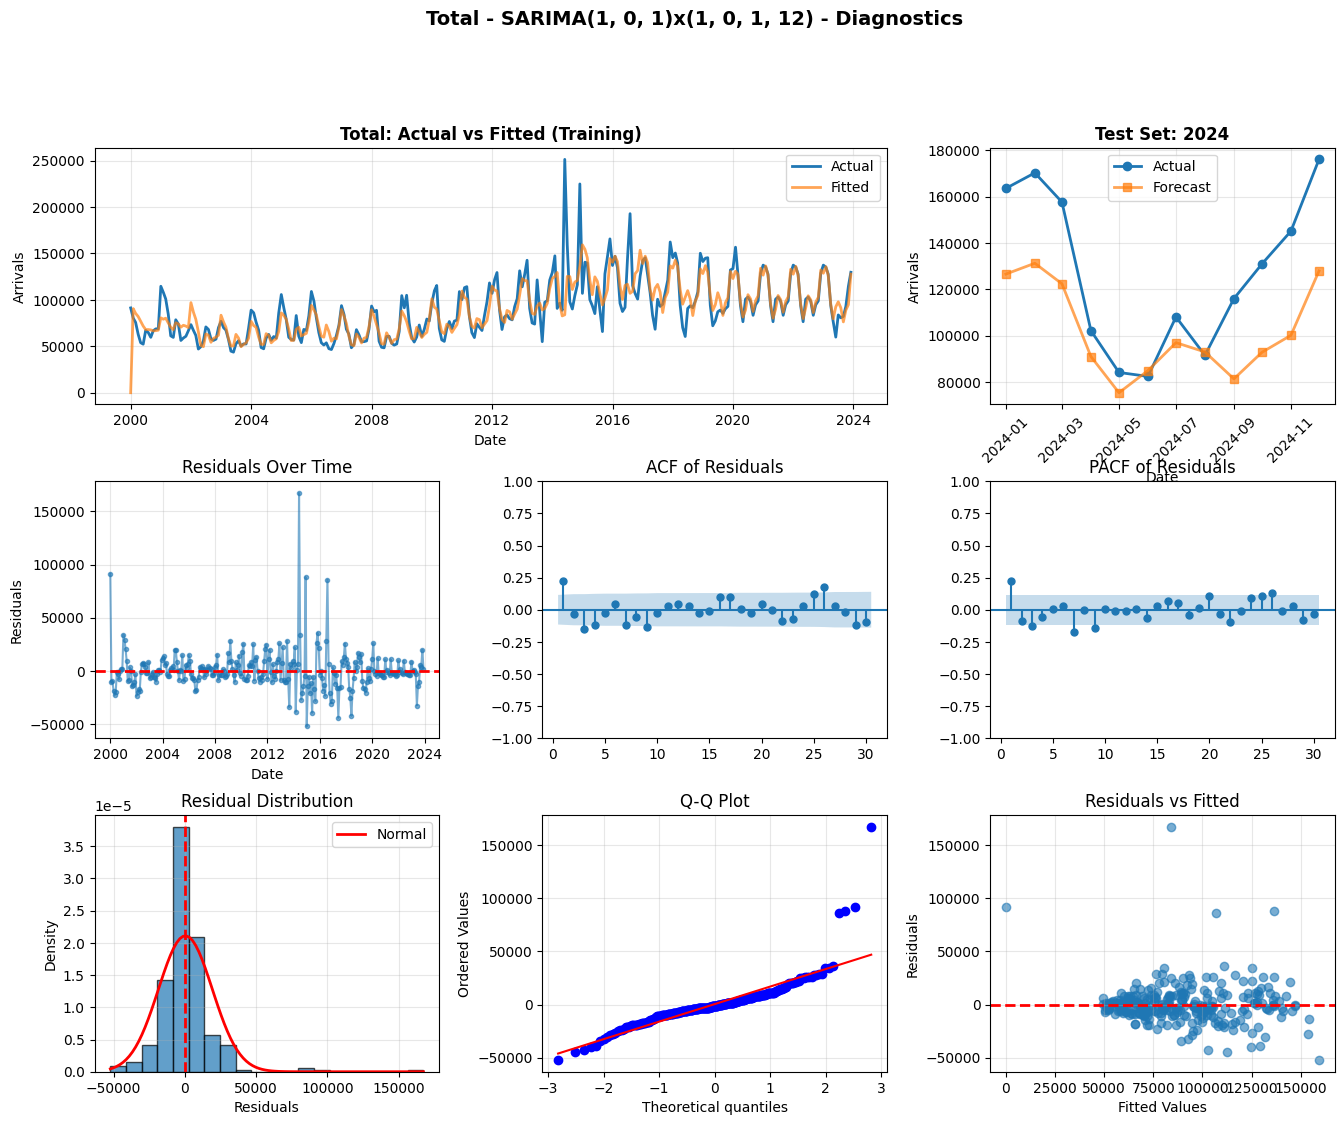


✓ SARIMA model completed for TOTAL

SUMMARY OF SARIMA RESULTS

               Continent                         Model  p  d  q  P  D  Q  s         AIC        AICc         BIC          MAE         RMSE    MAPE (%) Mean_Test LB_Test JB_Test ARCH_Test Overall_Diagnostic  Train_Obs  Test_Obs
                  Africa SARIMA(2, 0, 1)x(1, 0, 1, 12)  2  0  1  1  0  1 12 4375.565326 4375.864259 4397.543089   146.869632   184.401732   45.512671 Excellent    Pass    Fail      Pass          Some Fail        288        12
America_Central_E_Caribe SARIMA(3, 0, 2)x(1, 0, 2, 12)  3  0  2  1  0  2 12  652.396151  653.043633  685.362795 49112.149079 49113.493475 3860.847580    Biased    Fail    Fail      Fail          Some Fail        288        12
        America_Do_Norte SARIMA(0, 0, 2)x(2, 0, 2, 12)  0  0  2  2  0  2 12   14.000000   14.400000   39.640723 18354.583333 19069.589012  100.000000    Biased    Fail    Fail      Fail          Some Fail        288        12
          America_Do_Sul SARIMA(

In [ ]:
## Auto ARIMA (SARIMA without COVID Dummy) - By Continent
## Using statsmodels directly (no pmdarima needed)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print(f"=== Auto ARIMA (SARIMA) - No Exogenous Variables ===")
print(f"Train period: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Test period: {test_df['date'].min()} to {test_df['date'].max()}")
print("\n" + "="*80 + "\n")

# Get unique continents
continents = sorted(train_df['continent'].unique())

# Store results
arima_results = []

# Define parameter ranges for grid search
p_range = range(0, 4)
d_range = [0]
q_range = range(0, 4)
P_range = range(0, 3)
D_range = [0]
Q_range = range(0, 3)
s = 12

for continent in continents:
    print(f"\n{'='*80}")
    print(f"TARGET: {continent.upper()}")
    print(f"{'='*80}\n")
    
    # Filter data for this continent
    train_continent = train_df[train_df['continent'] == continent].copy()
    test_continent = test_df[test_df['continent'] == continent].copy()
    
    # Sort and set index
    train_continent = train_continent.sort_values('date').set_index('date')
    test_continent = test_continent.sort_values('date').set_index('date')
    
    # Prepare data (NO exogenous variables)
    y_train = train_continent['actual']
    y_test = test_continent['actual']
    
    print(f"Training observations: {len(y_train)} ({y_train.index.min()} to {y_train.index.max()})")
    print(f"Test observations: {len(y_test)} ({y_test.index.min()} to {y_test.index.max()})")
    print(f"Mean arrivals (train): {y_train.mean():.2f}")
    
    print(f"\n--- Running Grid Search for Best SARIMA Model ---")
    print("This may take a few minutes...")
    
    best_aicc = np.inf
    best_model = None
    best_order = None
    best_seasonal_order = None
    
    # Grid search
    total_models = len(list(product(p_range, d_range, q_range, P_range, D_range, Q_range)))
    model_count = 0
    
    try:
        for p in p_range:
            for d in d_range:
                for q in q_range:
                    for P in P_range:
                        for D in D_range:
                            for Q in Q_range:
                                model_count += 1
                                try:
                                    # ✓ NO exog parameter
                                    model = SARIMAX(
                                        y_train,
                                        order=(p, d, q),
                                        seasonal_order=(P, D, Q, s),
                                        enforce_stationarity=True,
                                        enforce_invertibility=True
                                    )
                                    
                                    fitted_model = model.fit(disp=False, maxiter=200)
                                    aicc = fitted_model.aicc
                                    
                                    if aicc < best_aicc:
                                        best_aicc = aicc
                                        best_model = fitted_model
                                        best_order = (p, d, q)
                                        best_seasonal_order = (P, D, Q, s)
                                        
                                    if model_count % 20 == 0:
                                        print(f"  Tested {model_count}/{total_models} models... Best AICc: {best_aicc:.2f}")
                                        
                                except:
                                    continue
        
        print(f"\n✓ Best Model Found: SARIMA{best_order} x {best_seasonal_order}")
        print(f"✓ AICc: {best_aicc:.2f}")
        
        # Extract model parameters
        p, d, q = best_order
        P, D, Q, s_param = best_seasonal_order
        aic = best_model.aic
        aicc = best_model.aicc
        bic = best_model.bic
        
        # Make predictions on test set (NO exog)
        print(f"\n--- Test Set Predictions ---")
        forecast = best_model.forecast(steps=len(y_test))

        forecast_df = pd.DataFrame({
            'date': y_test.index,
            'continent': continent,
            'actual': y_test.values,
            'forecast': forecast.values,
            'error': y_test.values - forecast.values
        })

        if 'all_forecasts3' not in locals():
            all_forecasts3 = []
        all_forecasts3.append(forecast_df)

        fitted_values = best_model.fittedvalues

        train_forecast_df = pd.DataFrame({
            'date': y_train.index,
            'continent': continent,
            'actual': y_train.values,
            'forecast': fitted_values.values,
            'error': y_train.values - fitted_values.values,
            'abs_error': np.abs(y_train.values - fitted_values.values),
            'pct_error': ((y_train.values - fitted_values.values) / y_train.values) * 100
        })

        if 'all_train_forecasts3' not in locals():
            all_train_forecasts3 = []
        all_train_forecasts3.append(train_forecast_df)
        
        # Calculate metrics
        from sklearn.metrics import mean_absolute_error, mean_squared_error
        
        mae = mean_absolute_error(y_test, forecast)
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mape = np.mean(np.abs((y_test - forecast) / y_test)) * 100
        
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"MAPE: {mape:.2f}%")
        
        # Residual diagnostics
        print(f"\n--- Residual Diagnostics (Training Set) ---")
        residuals = best_model.resid
        print(f"Residual Mean: {residuals.mean():.4f}")
        print(f"Residual Std: {residuals.std():.2f}")

        # T-Test for Zero Mean
        print(f"\nT-Test for Zero Mean:")
        from scipy.stats import ttest_1samp
        t_stat, t_pvalue = ttest_1samp(residuals, 0)
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {t_pvalue:.4f}")
        
        threshold_5pct = 0.05 * residuals.std()
        threshold_10pct = 0.10 * residuals.std()
        mean_abs = abs(residuals.mean())
        
        if t_pvalue > 0.05:
            print(f"  ✓ PASS: Mean não é significativamente diferente de zero (p > 0.05)")
            if mean_abs < threshold_5pct:
                print(f"  ✓✓ EXCELENTE: |Mean| < 5% do Std ({threshold_5pct:.2f})")
                mean_result = "Excellent"
            elif mean_abs < threshold_10pct:
                print(f"  ✓ BOM: |Mean| < 10% do Std ({threshold_10pct:.2f})")
                mean_result = "Good"
            else:
                print(f"  ⚠️ ACEITÁVEL: |Mean| > 10% do Std, mas estatisticamente = 0")
                mean_result = "Acceptable"
        else:
            print(f"  ✗ FAIL: Mean é significativamente diferente de zero (p < 0.05)")
            if residuals.mean() > 0:
                print(f"  → Modelo SUBESTIMA sistematicamente os valores reais")
            else:
                print(f"  → Modelo SUPERESTIMA sistematicamente os valores reais")
            mean_result = "Biased"
        
        # Ljung-Box Test
        lb_test = acorr_ljungbox(residuals, lags=24, return_df=True)
        lb_pvalue = lb_test['lb_pvalue'].iloc[-1]
        print(f"\nLjung-Box Test (lag 24):")
        print(f"  p-value: {lb_pvalue:.4f}")
        if lb_pvalue > 0.05:
            print(f"  ✓ PASS: No significant autocorrelation (p > 0.05)")
            lb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Significant autocorrelation detected (p < 0.05)")
            lb_result = "Fail"
        
        # Jarque-Bera Test
        jb_stat, jb_pvalue = stats.jarque_bera(residuals)
        print(f"\nJarque-Bera Test (Normality):")
        print(f"  Statistic: {jb_stat:.4f}")
        print(f"  p-value: {jb_pvalue:.4f}")
        if jb_pvalue > 0.05:
            print(f"  ✓ PASS: Residuals are normally distributed (p > 0.05)")
            jb_result = "Pass"
        else:
            print(f"  ✗ FAIL: Residuals are not normally distributed (p < 0.05)")
            jb_result = "Fail"
        
        # ARCH Test
        from statsmodels.stats.diagnostic import het_arch
        try:
            arch_test = het_arch(residuals, nlags=10)
            arch_pvalue = arch_test[1]
            print(f"\nARCH Test (Heteroskedasticity):")
            print(f"  p-value: {arch_pvalue:.4f}")
            if arch_pvalue > 0.05:
                print(f"  ✓ PASS: No heteroskedasticity (p > 0.05)")
                arch_result = "Pass"
            else:
                print(f"  ✗ FAIL: Heteroskedasticity detected (p < 0.05)")
                arch_result = "Fail"
        except:
            arch_result = "Error"
            print(f"\nARCH Test: Could not be performed")
        
        # Overall diagnostic result
        print(f"\n--- Overall Residual Diagnostics ---")
        all_pass = all([lb_result == "Pass", jb_result == "Pass", arch_result == "Pass"])
        if all_pass:
            print("✓✓✓ ALL TESTS PASSED - Model residuals are well-behaved")
            diagnostic_result = "All Pass"
        else:
            print("⚠️ SOME TESTS FAILED - Review residual diagnostics")
            diagnostic_result = "Some Fail"
        
        # Plot diagnostics
        fig = plt.figure(figsize=(16, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
        
        # Plot 1: Fitted vs Actual (Training)
        ax1 = fig.add_subplot(gs[0, :2])
        fitted = best_model.fittedvalues
        ax1.plot(y_train.index, y_train.values, label='Actual', linewidth=2)
        ax1.plot(y_train.index, fitted, label='Fitted', linewidth=2, alpha=0.7)
        ax1.set_title(f'{continent.title()}: Actual vs Fitted (Training)', fontsize=12, fontweight='bold')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Arrivals')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Forecast vs Actual (Test)
        ax2 = fig.add_subplot(gs[0, 2])
        ax2.plot(y_test.index, y_test.values, label='Actual', linewidth=2, marker='o')
        ax2.plot(y_test.index, forecast, label='Forecast', linewidth=2, alpha=0.7, marker='s')
        ax2.set_title(f'Test Set: 2024', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Arrivals')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        # Plot 3: Residuals over time
        ax3 = fig.add_subplot(gs[1, 0])
        ax3.plot(residuals.index, residuals, marker='o', markersize=3, alpha=0.6)
        ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax3.set_title('Residuals Over Time')
        ax3.set_xlabel('Date')
        ax3.set_ylabel('Residuals')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: ACF of Residuals
        ax4 = fig.add_subplot(gs[1, 1])
        plot_acf(residuals, lags=30, ax=ax4, zero=False)
        ax4.set_title('ACF of Residuals')
        
        # Plot 5: PACF of Residuals
        ax5 = fig.add_subplot(gs[1, 2])
        plot_pacf(residuals, lags=30, ax=ax5, zero=False)
        ax5.set_title('PACF of Residuals')
        
        # Plot 6: Histogram of Residuals
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.hist(residuals, bins=20, alpha=0.7, edgecolor='black', density=True)
        ax6.axvline(x=0, color='r', linestyle='--', linewidth=2)
        # Add normal distribution overlay
        mu, sigma = residuals.mean(), residuals.std()
        x = np.linspace(residuals.min(), residuals.max(), 100)
        ax6.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
        ax6.set_title('Residual Distribution')
        ax6.set_xlabel('Residuals')
        ax6.set_ylabel('Density')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        
        # Plot 7: Q-Q Plot
        ax7 = fig.add_subplot(gs[2, 1])
        stats.probplot(residuals, dist="norm", plot=ax7)
        ax7.set_title('Q-Q Plot')
        ax7.grid(True, alpha=0.3)
        
        # Plot 8: Residuals vs Fitted
        ax8 = fig.add_subplot(gs[2, 2])
        ax8.scatter(fitted, residuals, alpha=0.6)
        ax8.axhline(y=0, color='r', linestyle='--', linewidth=2)
        ax8.set_xlabel('Fitted Values')
        ax8.set_ylabel('Residuals')
        ax8.set_title('Residuals vs Fitted')
        ax8.grid(True, alpha=0.3)
        
        plt.suptitle(f'{continent.title()} - SARIMA{best_order}x{best_seasonal_order} - Diagnostics', 
                     fontsize=14, fontweight='bold', y=0.995)
        plt.show()
        
        # Store results
        arima_results.append({
            'Continent': continent,
            'Model': f'SARIMA{best_order}x{best_seasonal_order}',
            'p': p, 'd': d, 'q': q,
            'P': P, 'D': D, 'Q': Q, 's': s_param,
            'AIC': aic,
            'AICc': aicc,
            'BIC': bic,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE (%)': mape,
            'Mean_Test': mean_result,
            'LB_Test': lb_result,
            'JB_Test': jb_result,
            'ARCH_Test': arch_result,
            'Overall_Diagnostic': diagnostic_result,
            'Train_Obs': len(y_train),
            'Test_Obs': len(y_test)
        })
        
        print(f"\n✓ SARIMA model completed for {continent}")
        
    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()
        arima_results.append({
            'Continent': continent,
            'Model': 'Error',
            'p': np.nan, 'd': np.nan, 'q': np.nan,
            'P': np.nan, 'D': np.nan, 'Q': np.nan, 's': np.nan,
            'AIC': np.nan,
            'AICc': np.nan,
            'BIC': np.nan,
            'MAE': np.nan,
            'RMSE': np.nan,
            'MAPE (%)': np.nan,
            'Mean_Test': 'Error',
            'LB_Test': 'Error',
            'JB_Test': 'Error',
            'ARCH_Test': 'Error',
            'Overall_Diagnostic': 'Error',
            'Train_Obs': np.nan,
            'Test_Obs': np.nan
        })
        continue

# Summary
print("\n" + "="*80)
print("SUMMARY OF SARIMA RESULTS")
print("="*80 + "\n")

results_df = pd.DataFrame(arima_results)
print(results_df.to_string(index=False))

print("\n" + "="*80)
print("PERFORMANCE METRICS RANKING")
print("="*80 + "\n")

print("Best models by RMSE (lower is better):")
print(results_df.sort_values('RMSE')[['Continent', 'Model', 'RMSE', 'MAE', 'MAPE (%)']].to_string(index=False))

print("\n" + "="*80)
print("✓ SARIMA modeling completed for all continents")
print("="*80)

print("\n" + "="*80)
print("Notes:")
print("- SARIMA(p,d,q)x(P,D,Q,s) where s=12 (monthly seasonality)")
print("- AICc: Corrected AIC (better for small samples)")
print("- MAE: Mean Absolute Error")
print("- RMSE: Root Mean Squared Error")
print("- MAPE: Mean Absolute Percentage Error")
print("- LB_Test: Ljung-Box (autocorrelation) - Pass means no autocorrelation")
print("- JB_Test: Jarque-Bera (normality) - Pass means residuals are normal")
print("- ARCH_Test: Heteroskedasticity - Pass means constant variance")
print("- Lower RMSE/MAE/MAPE = Better predictions")
print("- Lower AICc/BIC = Better model fit")
print("="*80)

if 'all_forecasts3' in locals() and len(all_forecasts3) > 0:
    forecasts_final = pd.concat(all_forecasts3, ignore_index=True)
    output_path = PROJECT_ROOT / "notebooks" / "modeling" / "00_sarima_forecasts_TEST.csv"
    forecasts_final.to_csv(output_path, index=False)
    print(f"\n✓ Test forecasts saved: {output_path}")

if 'all_train_forecasts3' in locals() and len(all_train_forecasts3) > 0:
    train_forecasts_final = pd.concat(all_train_forecasts3, ignore_index=True)
    output_path_train = PROJECT_ROOT / "notebooks" / "modeling" / "00_sarima_forecasts_TRAIN.csv"
    train_forecasts_final.to_csv(output_path_train, index=False)
    print(f"✓ Train fitted values saved: {output_path_train}")

In [8]:
if 'all_forecasts3' in locals() and len(all_forecasts3) > 0:
    forecasts_final = pd.concat(all_forecasts3, ignore_index=True)
    output_path = PROJECT_ROOT / "notebooks" / "modeling" / "00_sarima_forecasts_TEST.csv"
    forecasts_final.to_csv(output_path, index=False)
    print(f"\n✓ Test forecasts saved: {output_path}")

if 'all_train_forecasts3' in locals() and len(all_train_forecasts3) > 0:
    train_forecasts_final = pd.concat(all_train_forecasts3, ignore_index=True)
    output_path_train = PROJECT_ROOT / "notebooks" / "modeling" / "00_sarima_forecasts_TRAIN.csv"
    train_forecasts_final.to_csv(output_path_train, index=False)
    print(f"✓ Train fitted values saved: {output_path_train}")


✓ Test forecasts saved: C:\Users\f0oo\OneDrive - PETROBRAS\Documentos\international_arrivals_time_series_forecasting\notebooks\modeling\00_sarima_forecasts_TEST.csv
✓ Train fitted values saved: C:\Users\f0oo\OneDrive - PETROBRAS\Documentos\international_arrivals_time_series_forecasting\notebooks\modeling\00_sarima_forecasts_TRAIN.csv
